<h1>Acting Analytics using Crime Dataset</h1>

<p>Acting or making decisions after processing the data. In this usecase, we shall determine where (coordinates) the police forces should be placed.

</p><p><strong>Import the data file and assign IDs to non-numerical columns:</strong>
</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
crime_data = pd.read_csv('C:/Users/Sandi/Downloads/Crime1.csv',
                           sep= ',', header= 0)
columnsTitles=['Category', 'Dates', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']
crime_data=crime_data.reindex(columns=columnsTitles)
crime_data= crime_data[:3000]
# new data frame with split value columns 
new = crime_data["Dates"].str.split(" ", n = 1, expand = True) 
# making seperate date column from Dates Column 
crime_data["Date"]= new[0] 
# making seperate time column from Dates Column 
crime_data["Time"]= new[1] 
# Dropping old Dates columns 
crime_data.drop(columns =["Dates"], inplace = True) 
#Mapping string type columns to number/int type.

crime_data['category_id'] = crime_data['Category'].factorize()[0]
crime_data['Date_id'] = crime_data['Date'].factorize()[0]
crime_data['Time_id'] = crime_data['Time'].factorize()[0]
crime_data['DayOfWeek_id'] = crime_data['DayOfWeek'].factorize()[0]
crime_data['PdDistrict_id'] = crime_data['PdDistrict'].factorize()[0]
crime_data['Resolution_id'] = crime_data['Resolution'].factorize()[0]
crime_data['Address_id'] = crime_data['Address'].factorize()[0]
columnsTitles=['Category', 'category_id', 'Date', 'Date_id','Time','Time_id', 'Descript', 'DayOfWeek', 'DayOfWeek_id','PdDistrict','PdDistrict_id', 'Resolution', 'Resolution_id','Address','Address_id', 'X', 'Y']
crime_data=crime_data.reindex(columns=columnsTitles)


<p><strong>Cluster the offesnses depending upon the category or day of the week or both:</strong>
</p>

<Figure size 1080x360 with 0 Axes>

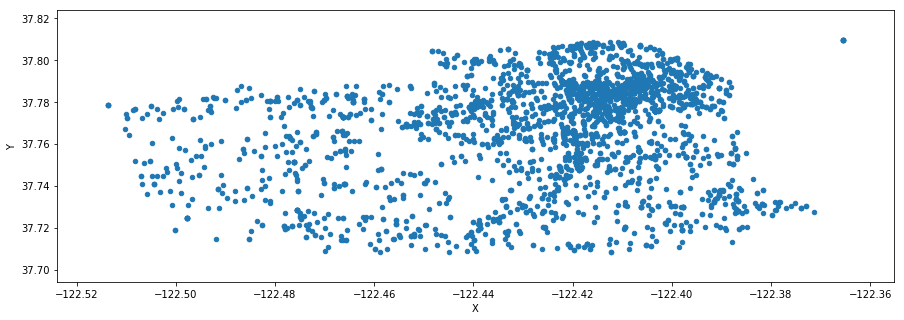

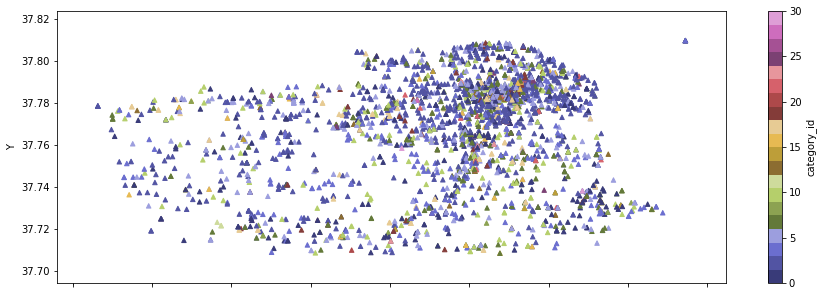

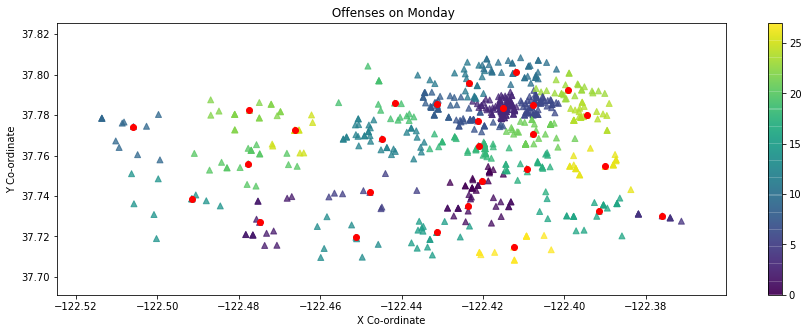

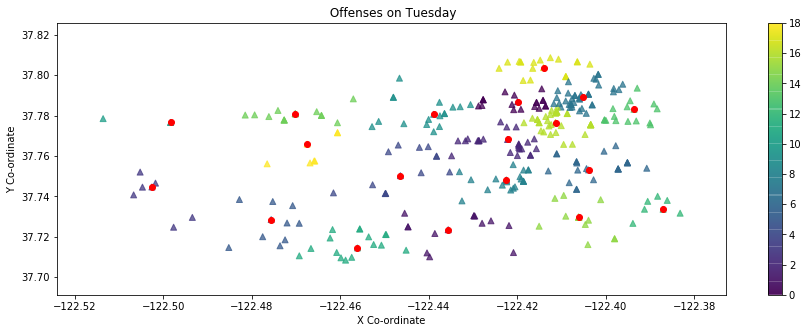

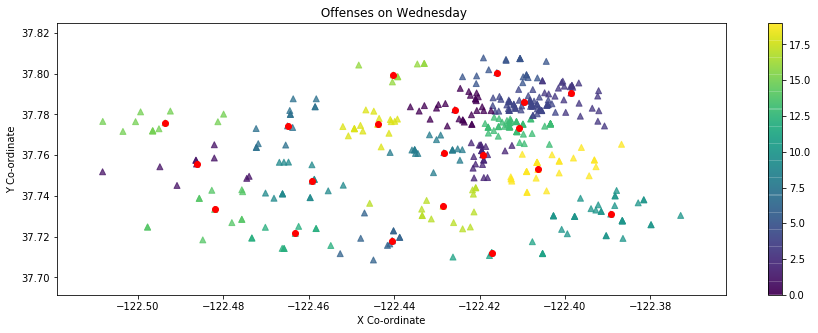

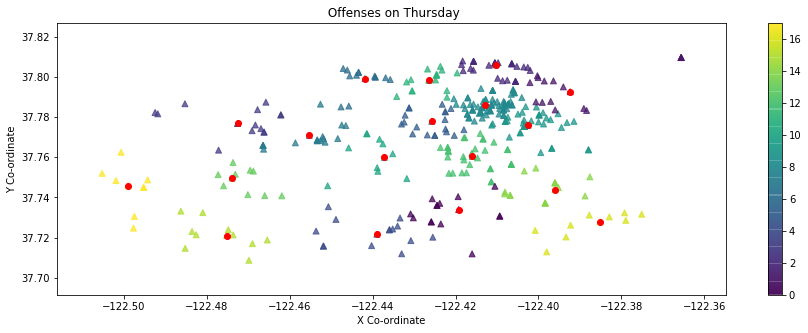

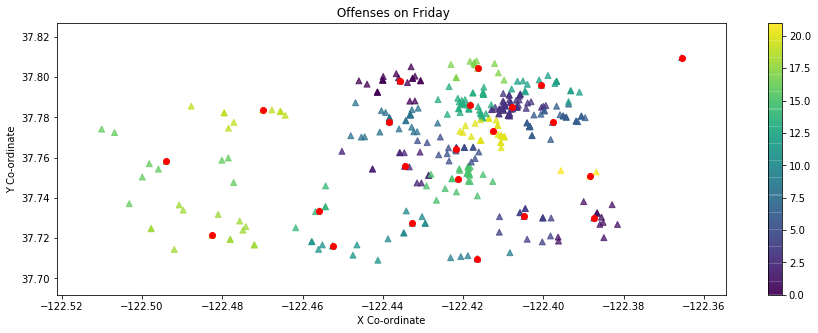

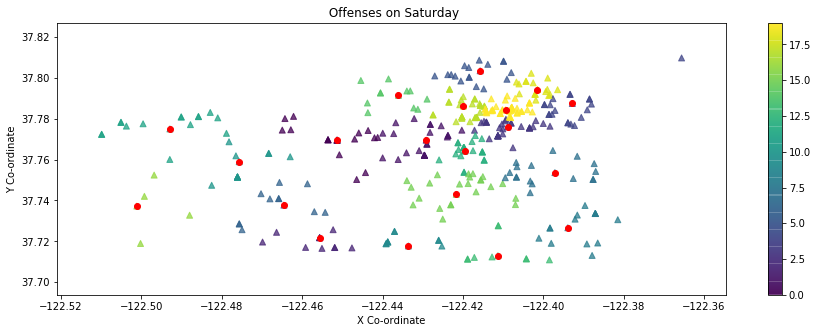

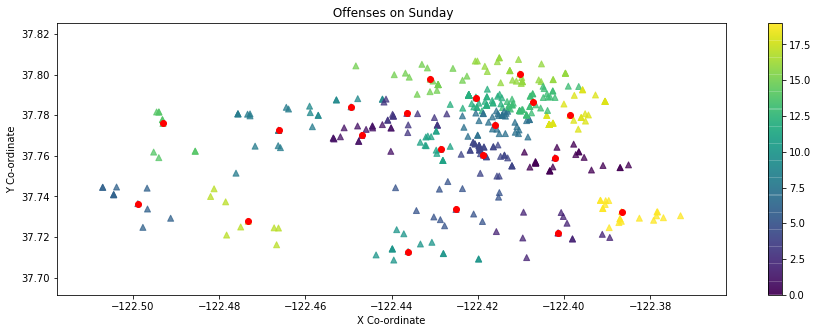

In [4]:
# Scatter plot of offenses w.r.t address co-ordinates (clustering: not category based)
from sklearn.cluster import AffinityPropagation

def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

def weekdaycrime(df, day):
    day_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    temp = df.loc[(df['DayOfWeek_id'] == day)]
    #temp.plot.scatter(x = 'X', y = 'Y', c = 'category_id',  marker='^')
    clust_labels2, cent2 = doAffinity(temp)
    
    affinity = pd.DataFrame(clust_labels2)
    temp.insert((temp.shape[1]),'affinity',affinity)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(temp['X'], temp['Y'], c = affinity[0],  marker='^' , alpha=0.75)
    title = " Offenses on "+ day_index[day]
    ax.set_title(title)
    ax.set_xlabel('X Co-ordinate')
    ax.set_ylabel('Y Co-ordinate')
    plt.colorbar(scatter)
    #plt.figure()
    plt.scatter(cent2[:,1],cent2[:,2], marker='o', color='r')
    

columnsTitles=['category_id', 'DayOfWeek_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
plt.figure()
df_temp.plot.scatter(x = 'X', y = 'Y')
df_temp.plot.scatter(x = 'X', y = 'Y', c = 'category_id',  marker='^', colormap = 'tab20b')
#df_temp.plot.scatter(x = 'X', y = 'Y', c = colors,  marker='^')
#scatPlot(0,df_temp)
columnsTitles=['DayOfWeek_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
for i in range(0,7):
    weekdaycrime(df_temp,i)

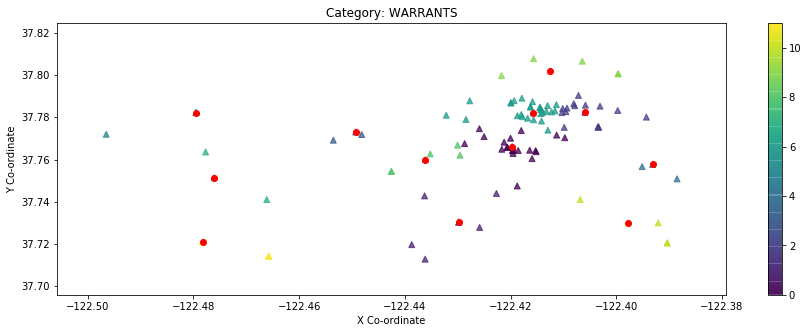

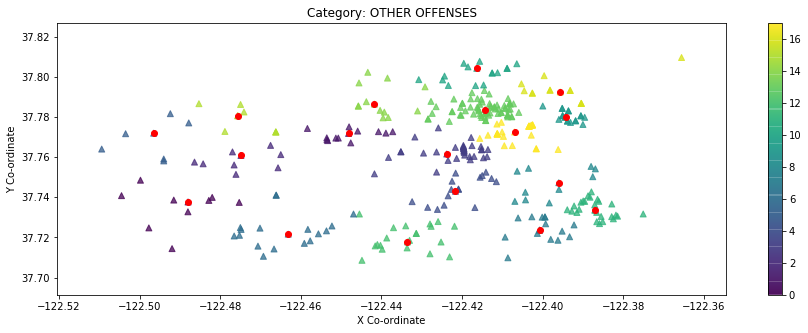

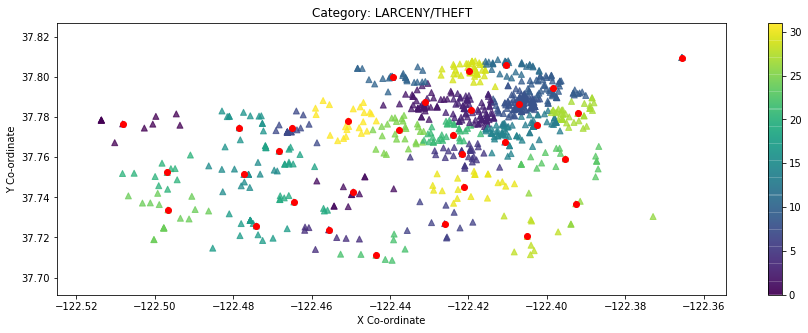

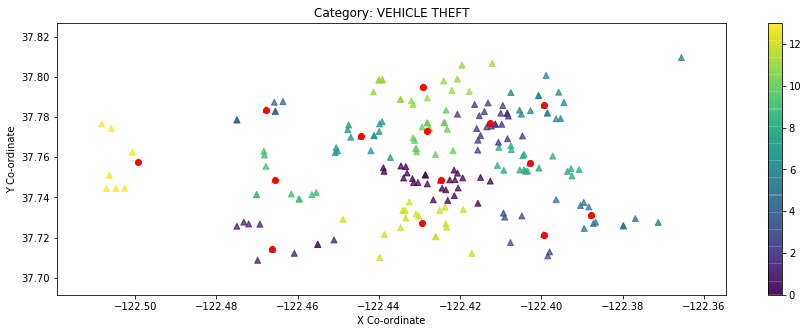

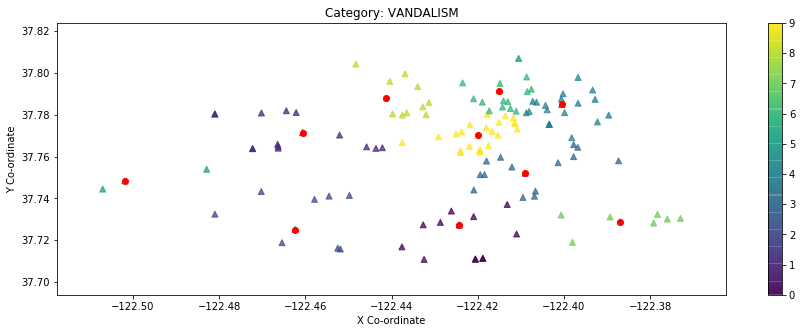

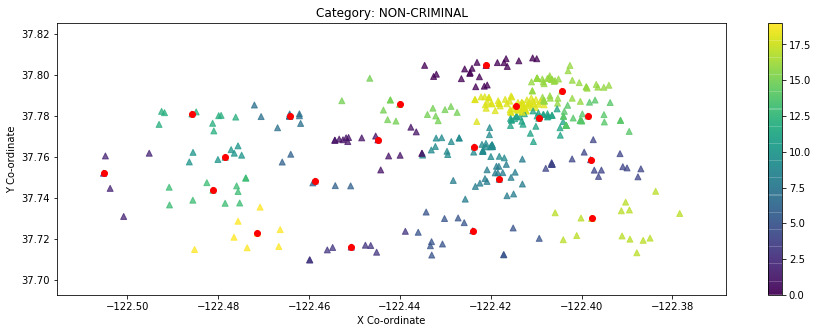

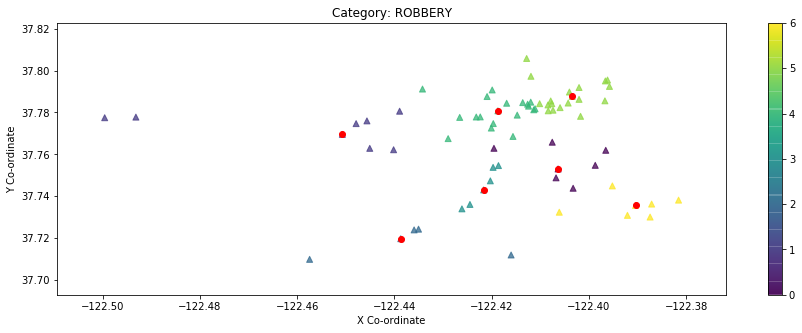

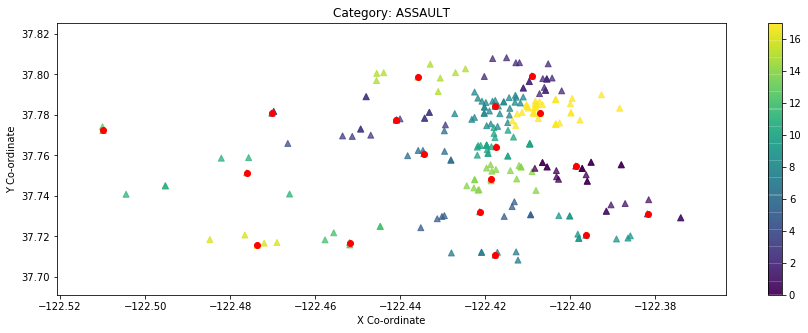

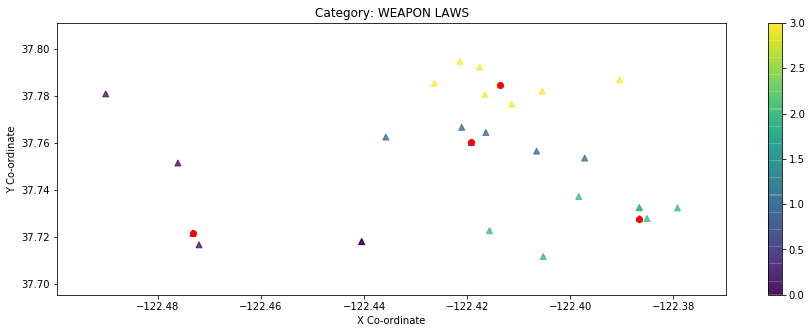

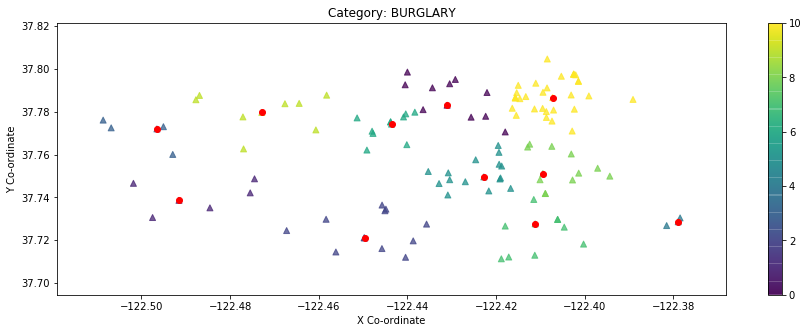

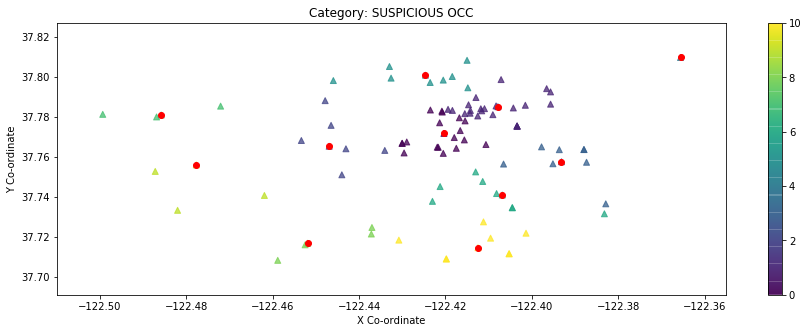

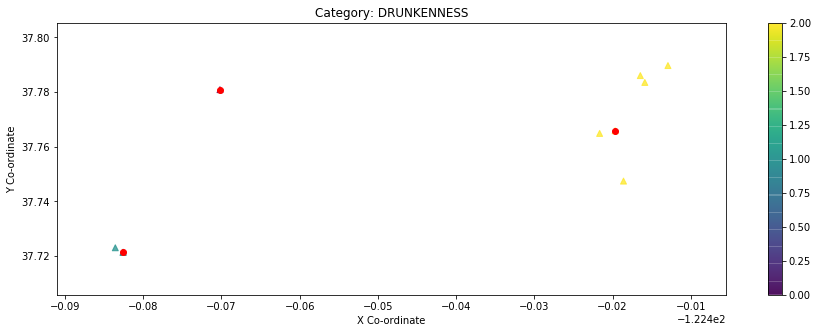

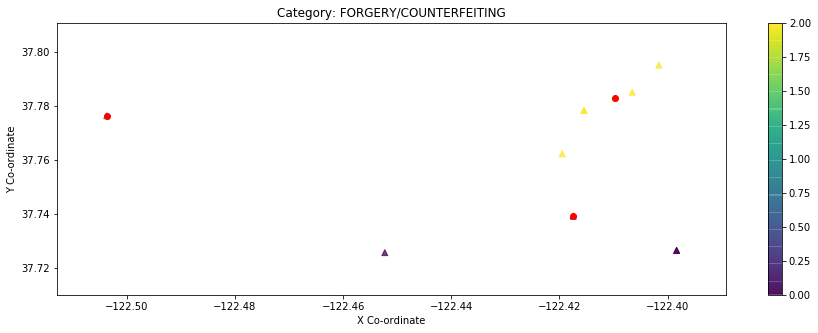

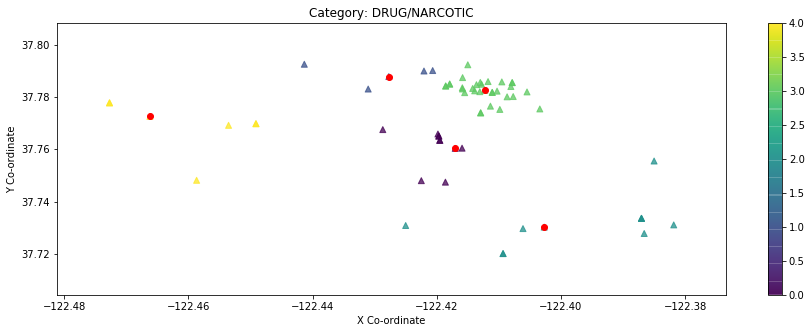

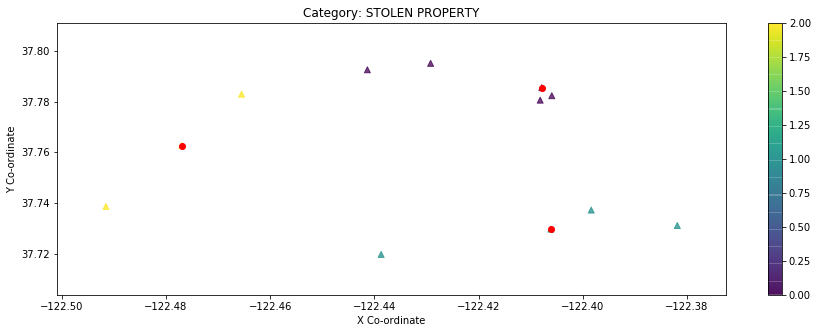

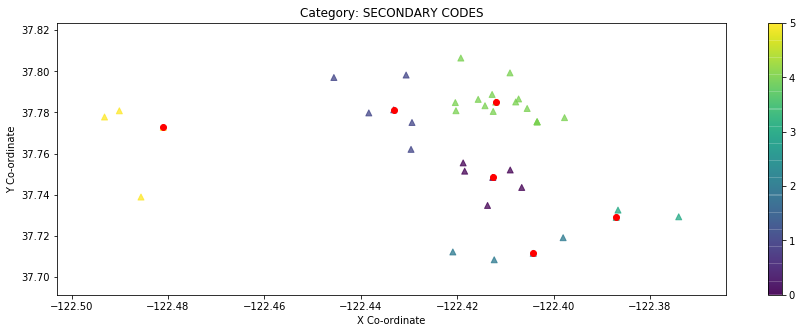

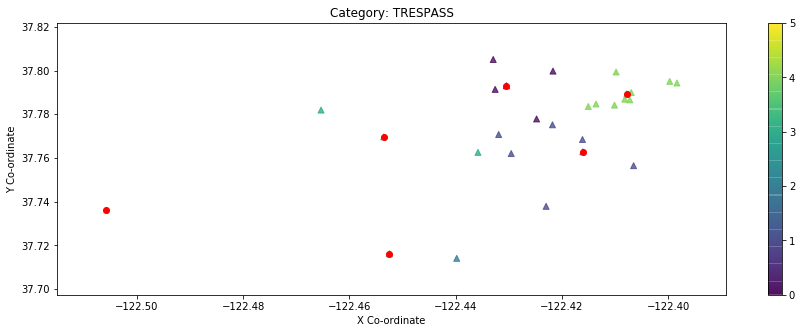

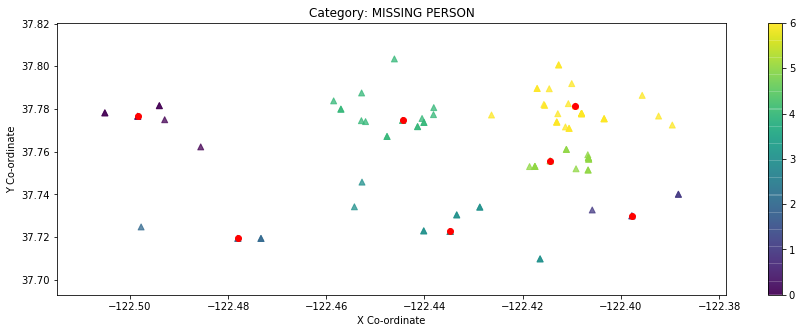

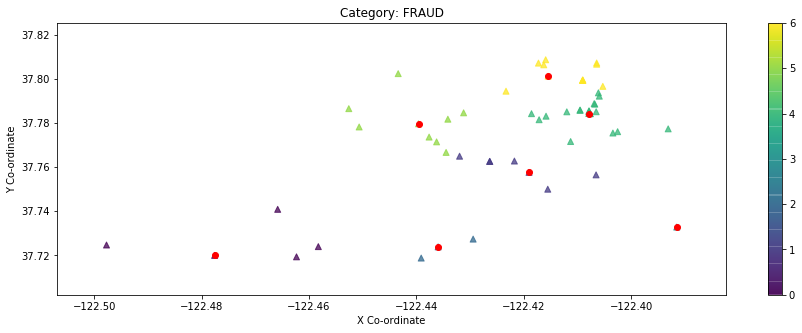

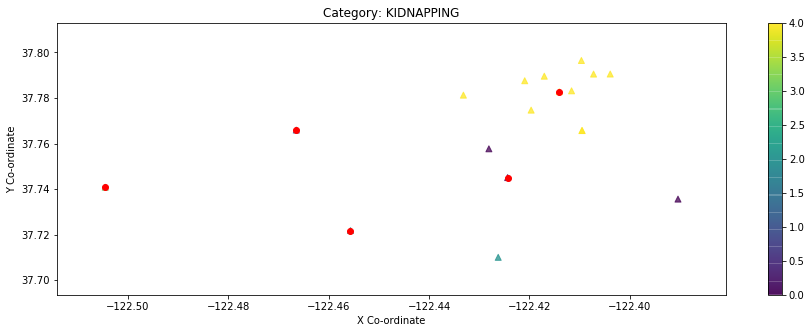

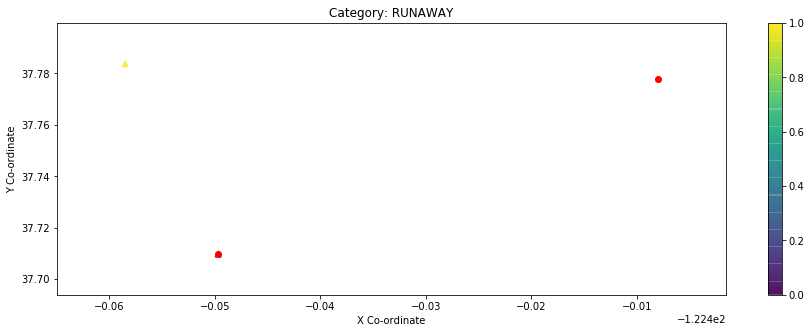

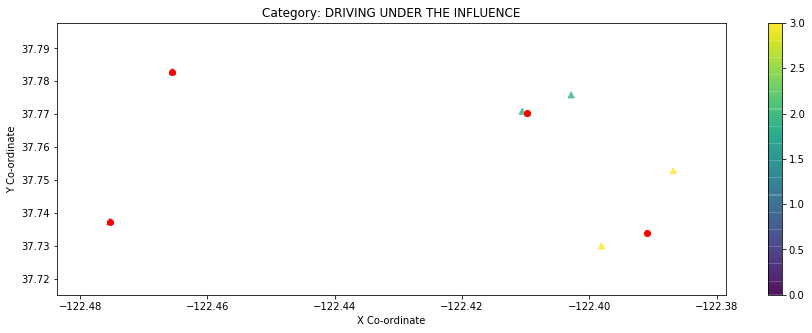

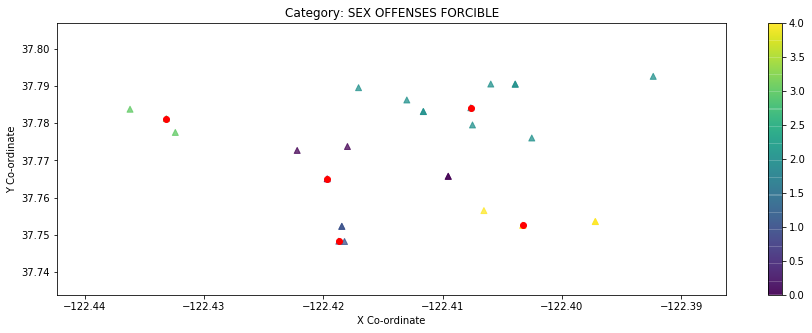

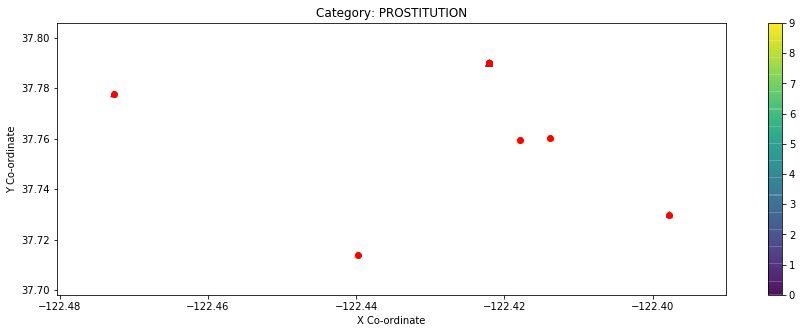

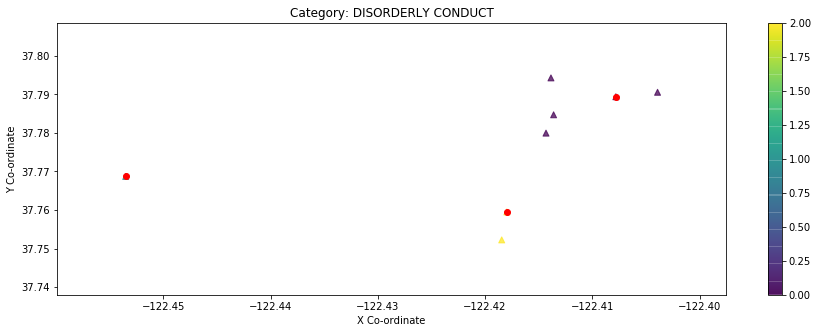

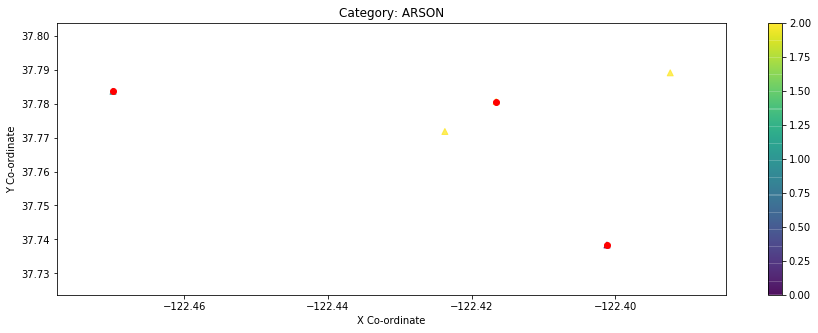

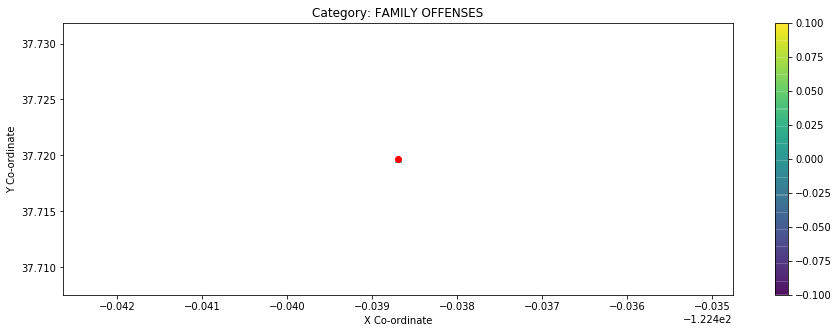

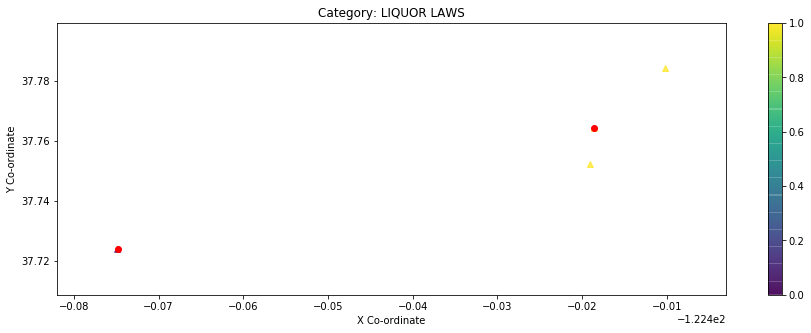

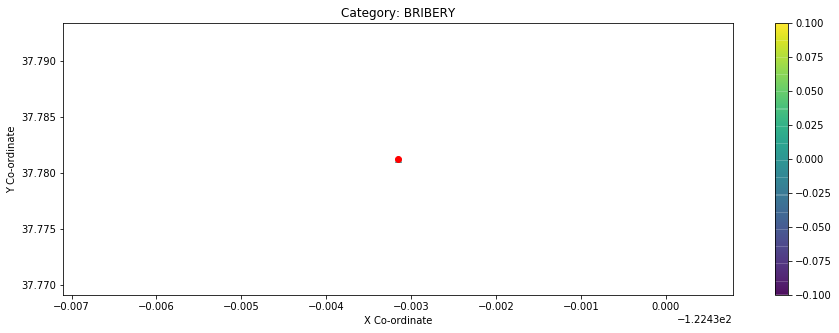

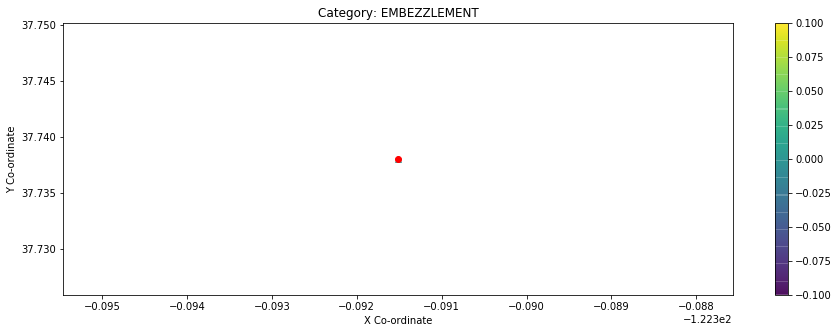

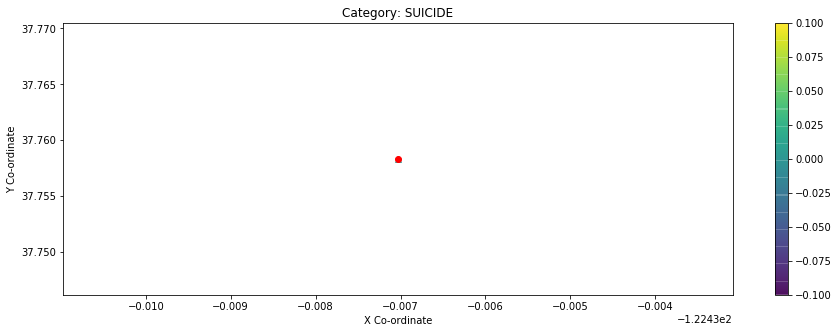

In [8]:
# Scatter plot of offences (clustering: per category based)
def crimeCat(df, cat):
    Cat_Index = ['WARRANTS','OTHER OFFENSES','LARCENY/THEFT','VEHICLE THEFT','VANDALISM','NON-CRIMINAL','ROBBERY','ASSAULT','WEAPON LAWS','BURGLARY','SUSPICIOUS OCC','DRUNKENNESS','FORGERY/COUNTERFEITING','DRUG/NARCOTIC','STOLEN PROPERTY','SECONDARY CODES','TRESPASS','MISSING PERSON','FRAUD','KIDNAPPING','RUNAWAY','DRIVING UNDER THE INFLUENCE','SEX OFFENSES FORCIBLE','PROSTITUTION','DISORDERLY CONDUCT','ARSON','FAMILY OFFENSES','LIQUOR LAWS','BRIBERY','EMBEZZLEMENT','SUICIDE']
    temp = df.loc[(df['category_id']==cat)]
    if(len(temp)>0):
        clust_labels2, cent2 = doAffinity(temp)
        affinity = pd.DataFrame(clust_labels2)
        temp.insert((temp.shape[1]),'affinity',affinity)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(temp['X'], temp['Y'], c = affinity[0],  marker='^' , alpha=0.75)
        title = "Category: "+ Cat_Index[cat] 
        ax.set_title(title)
        ax.set_xlabel('X Co-ordinate')
        ax.set_ylabel('Y Co-ordinate')
        plt.colorbar(scatter)
        plt.scatter(cent2[:,1],cent2[:,2], marker='o', color='r')
        
        
columnsTitles=['category_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
for i in range(0,31):
    crimeCat(df_temp,i)


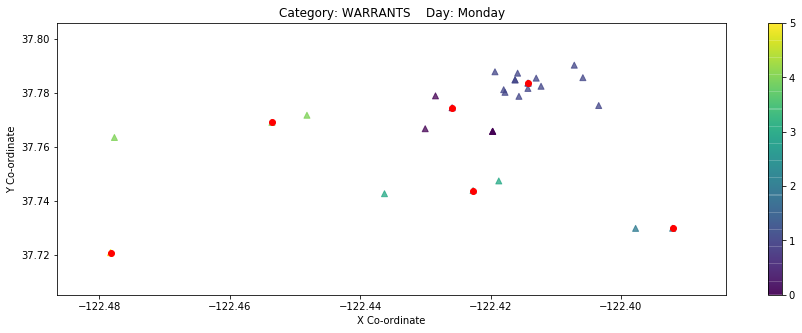

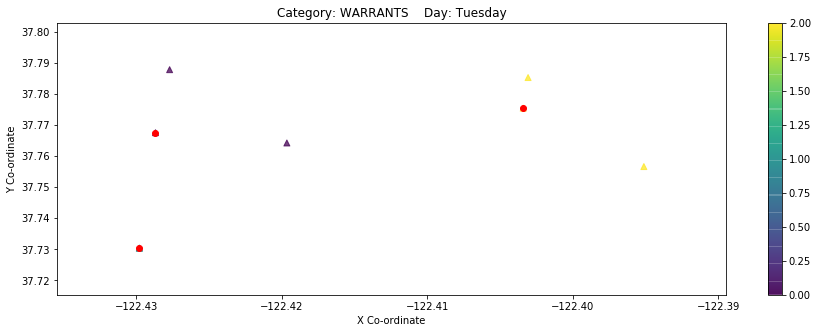

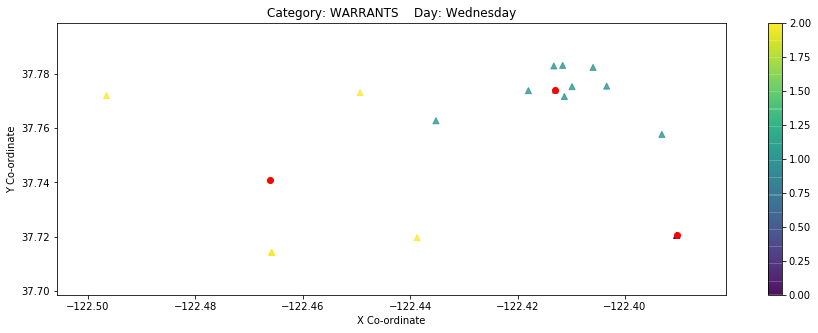

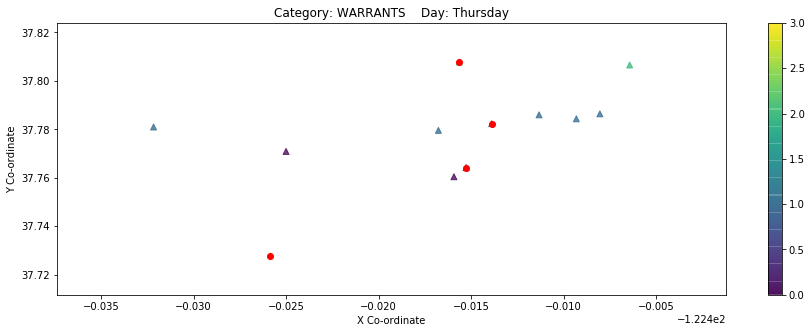

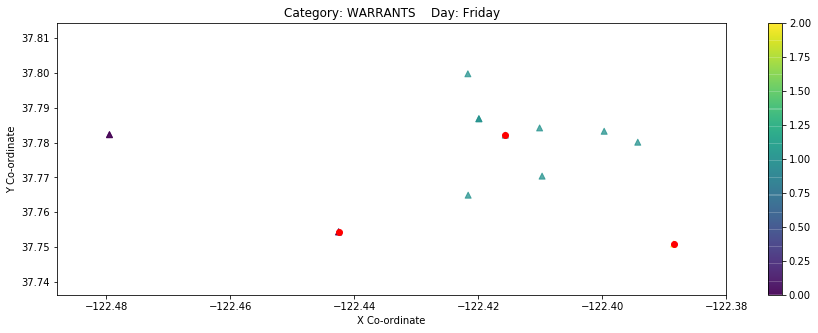

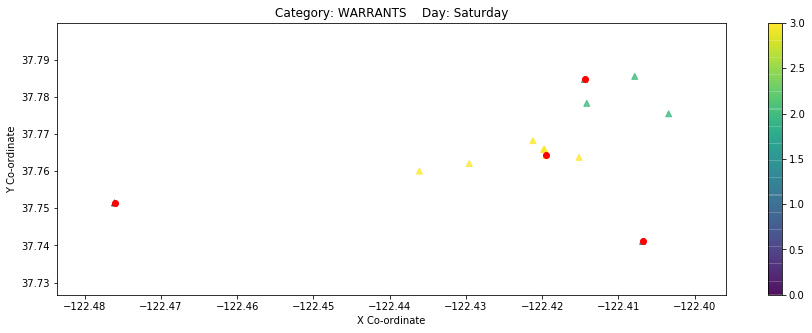

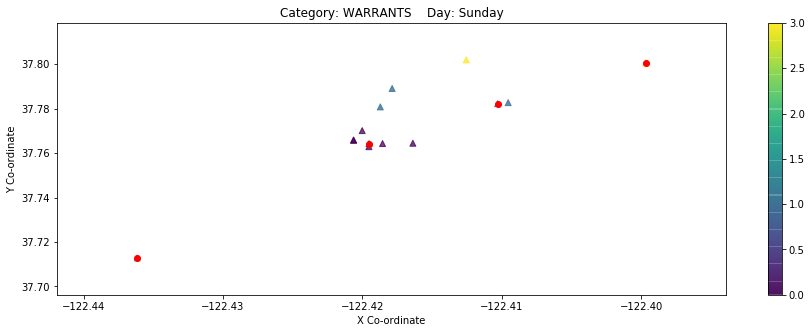

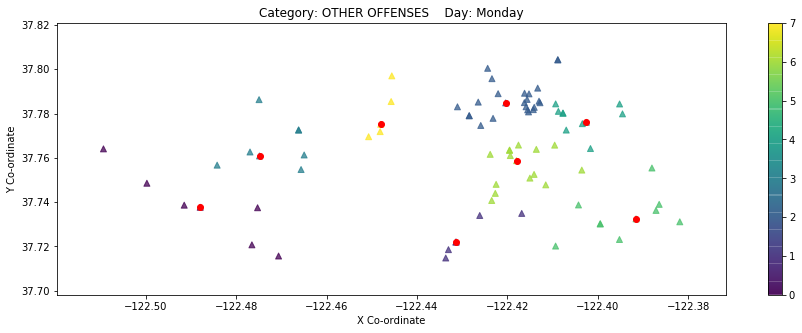

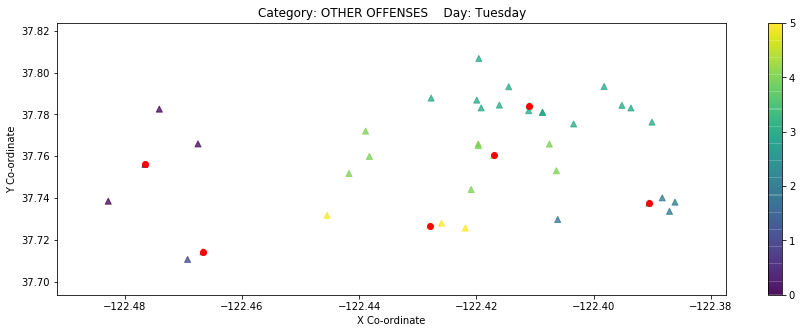

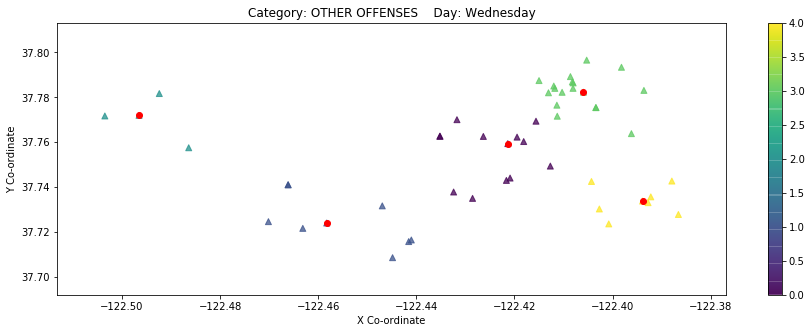

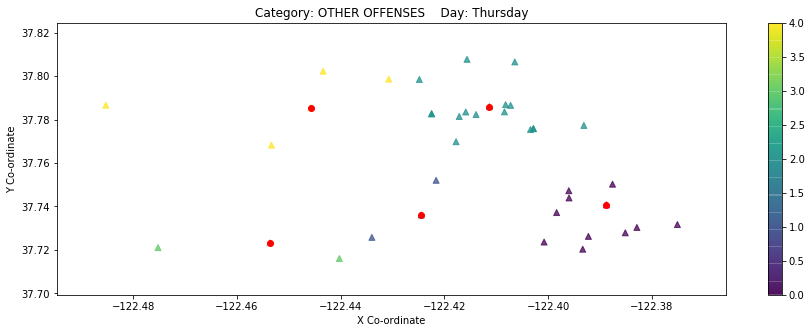

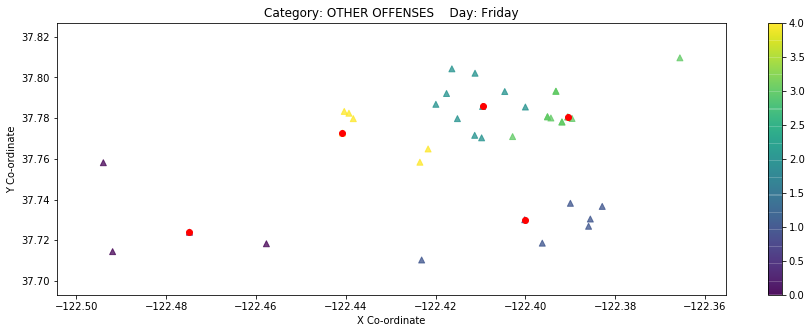

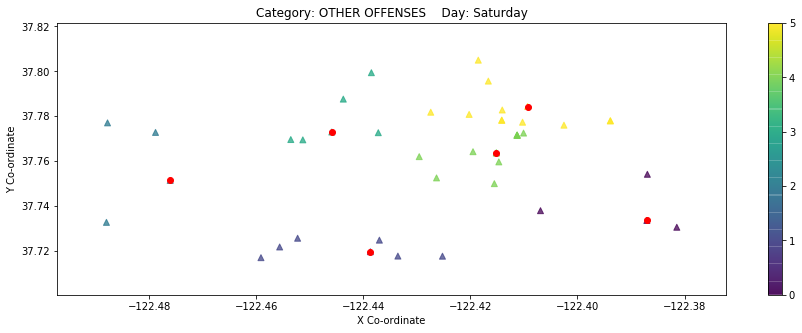

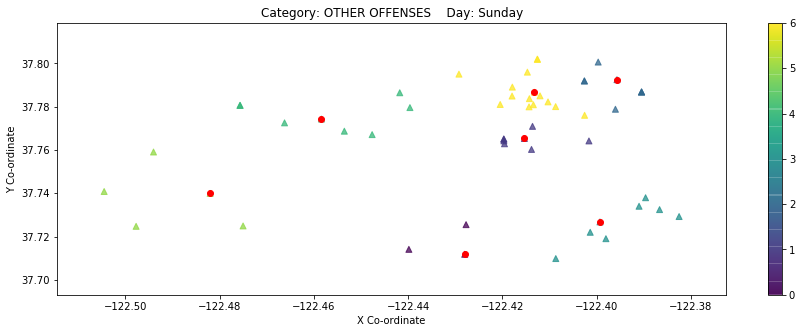

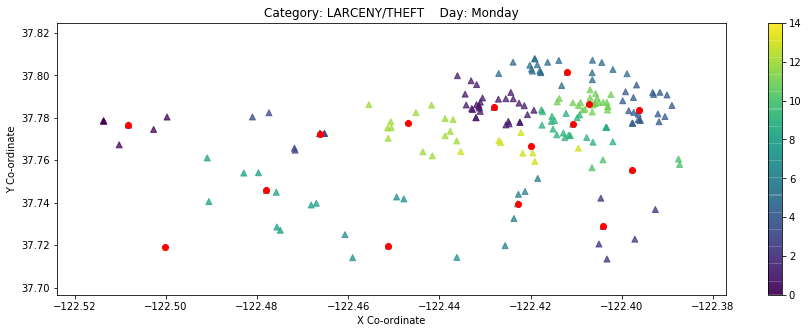

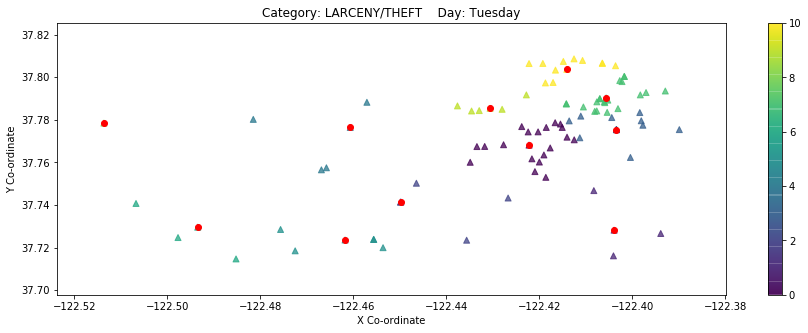

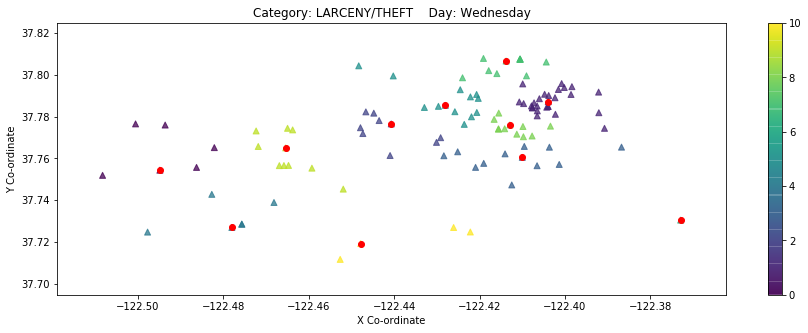

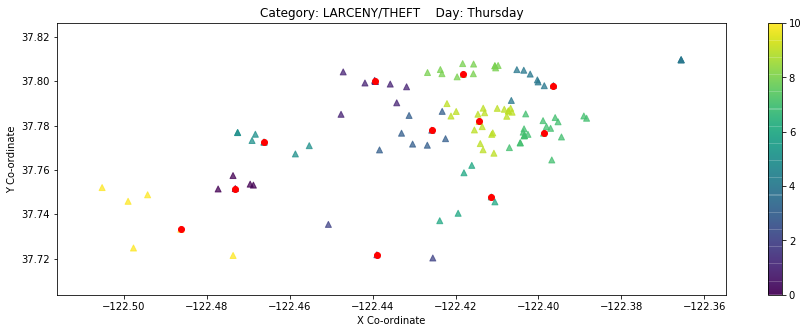

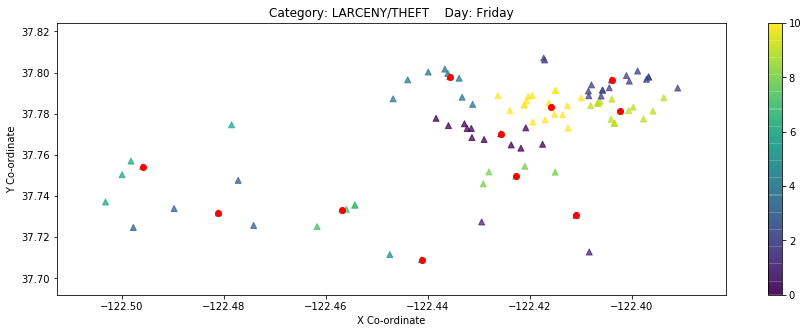

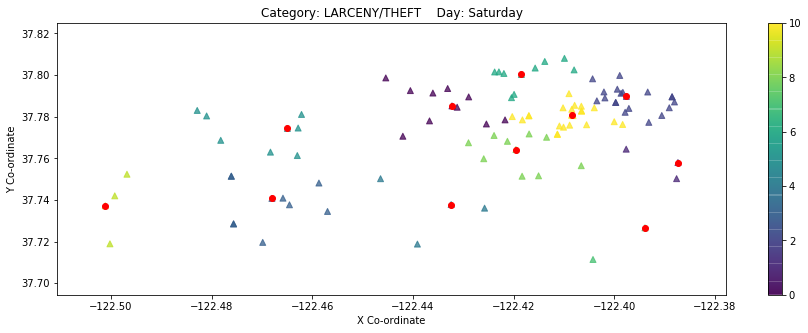

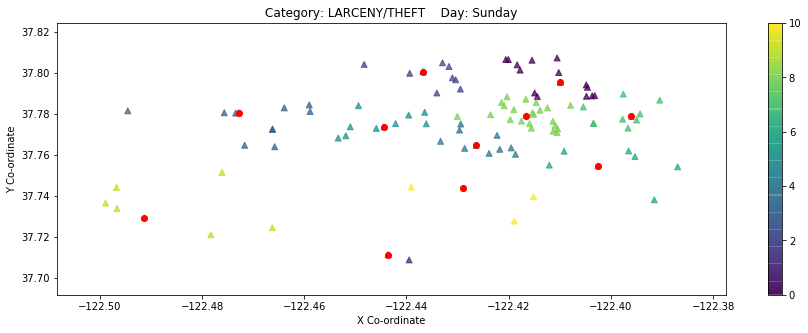

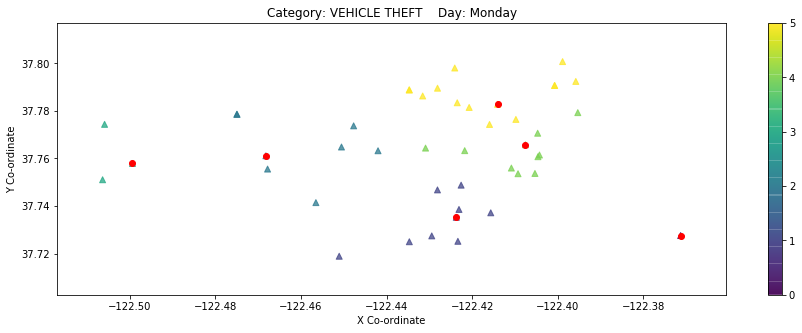

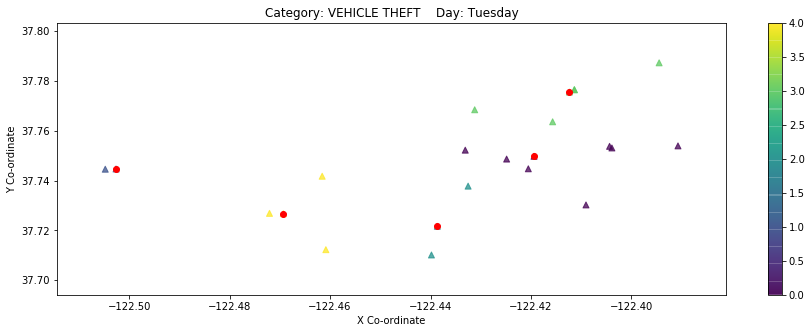

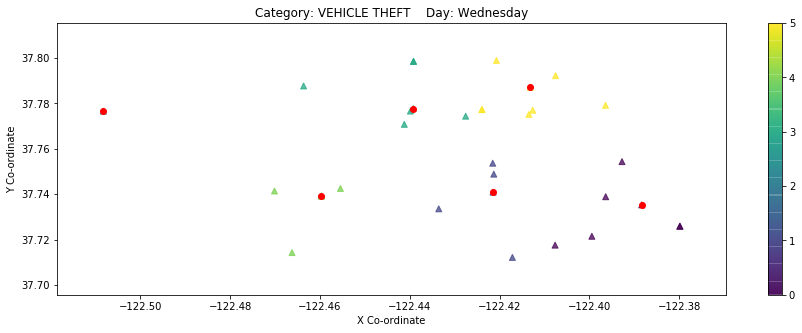

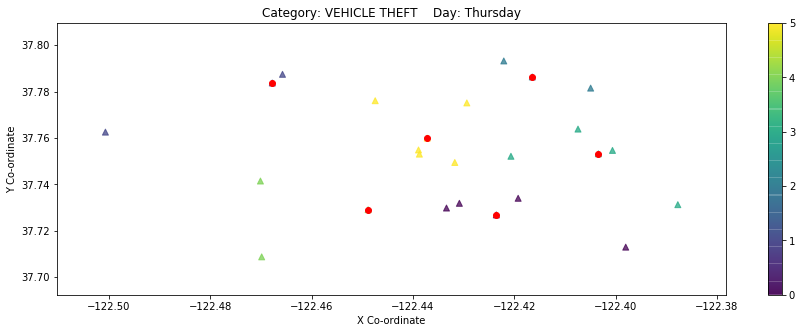

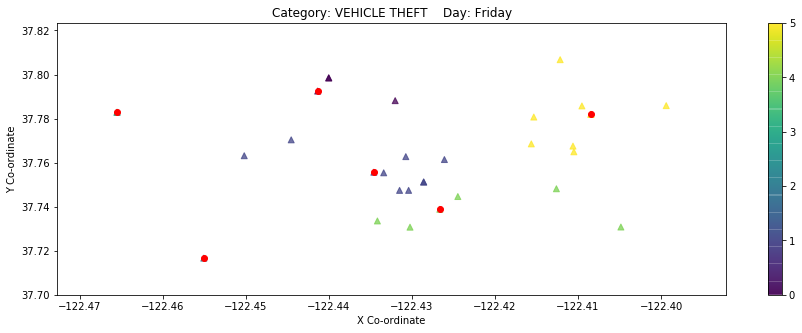

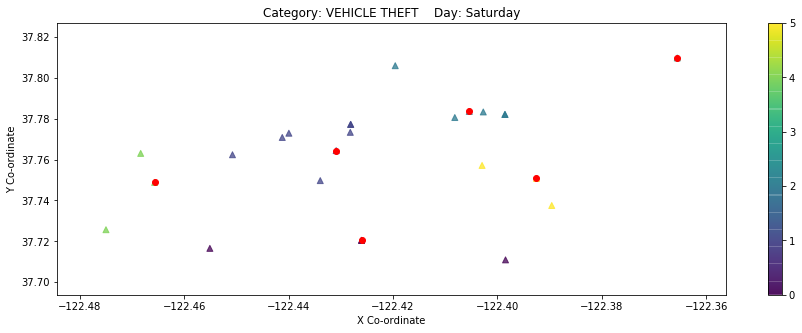

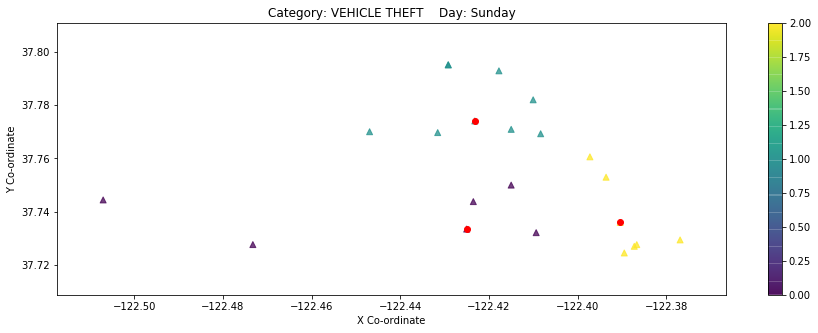

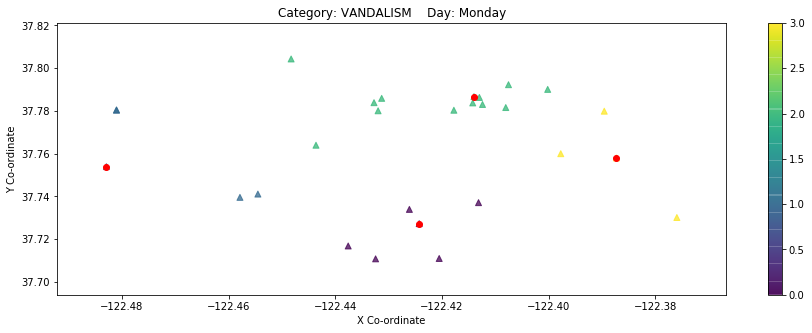

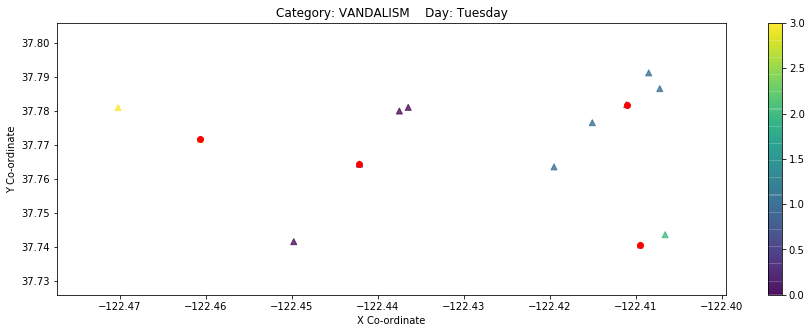

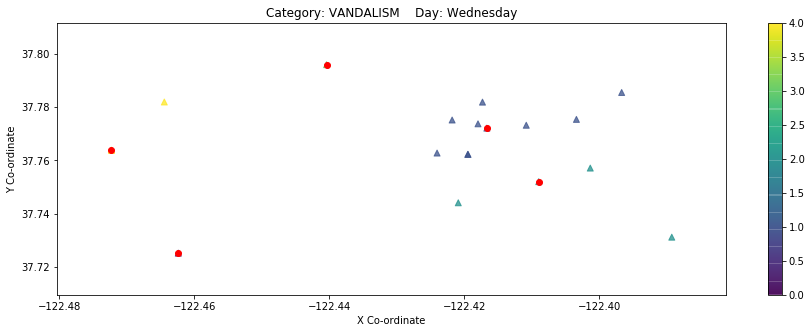

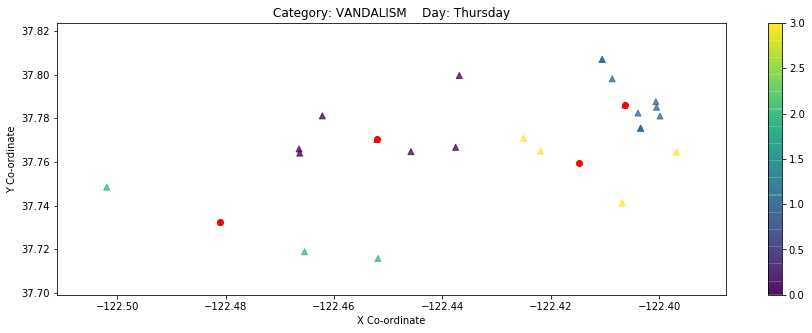

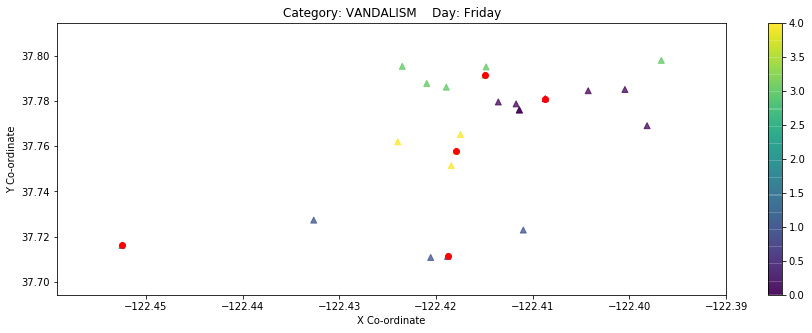

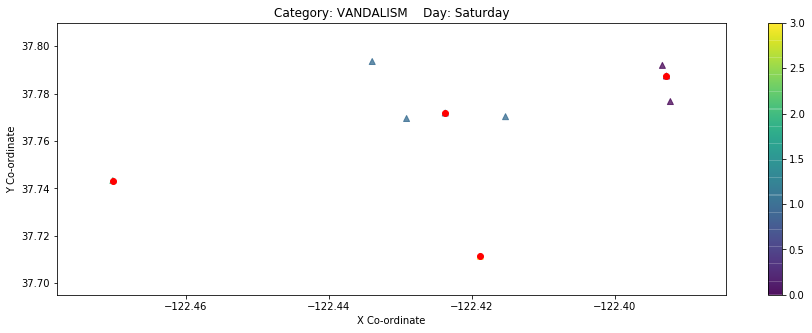

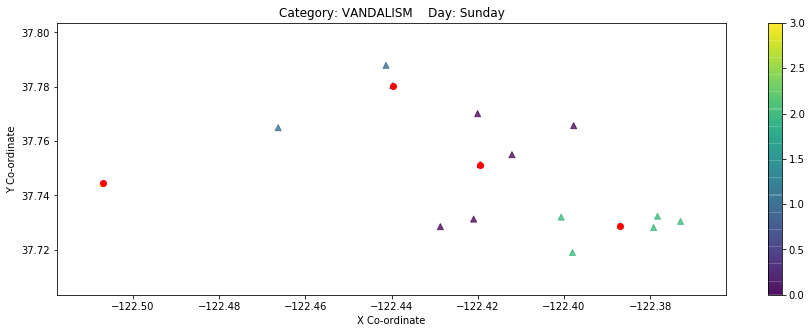

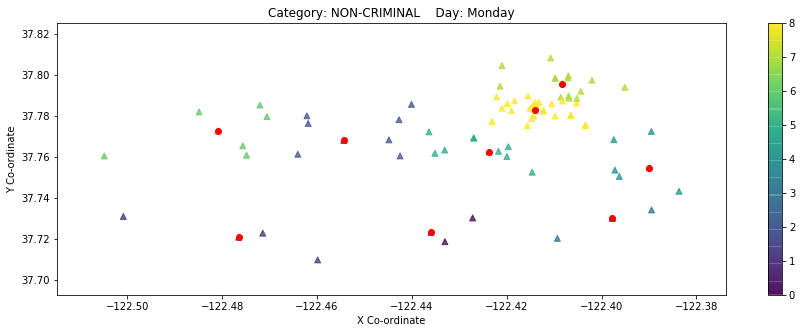

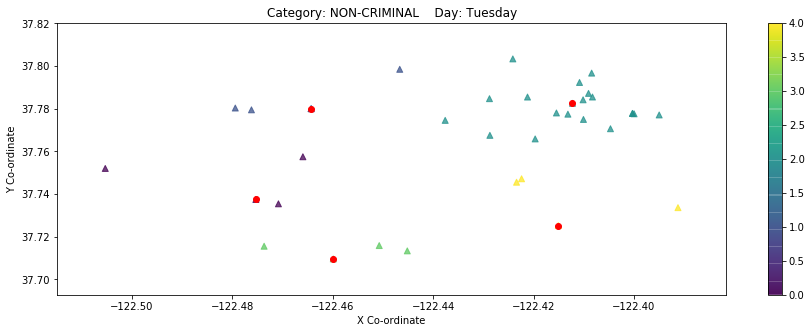

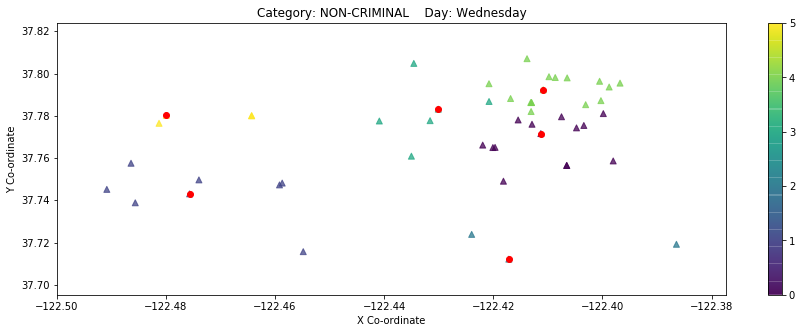

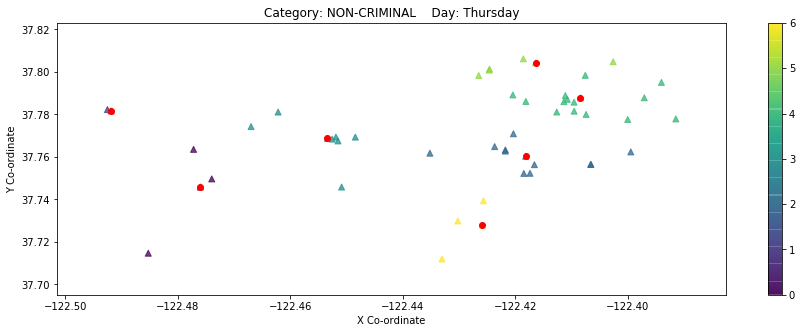

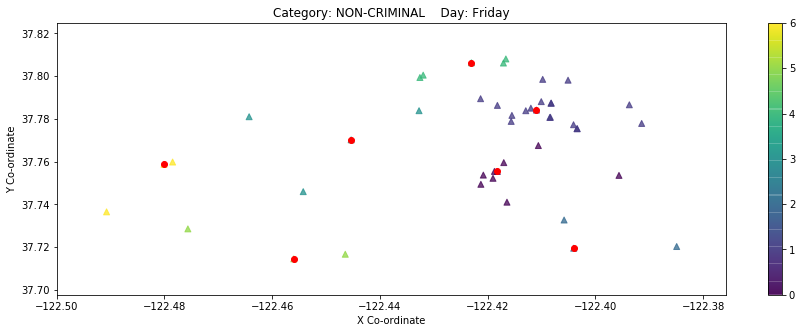

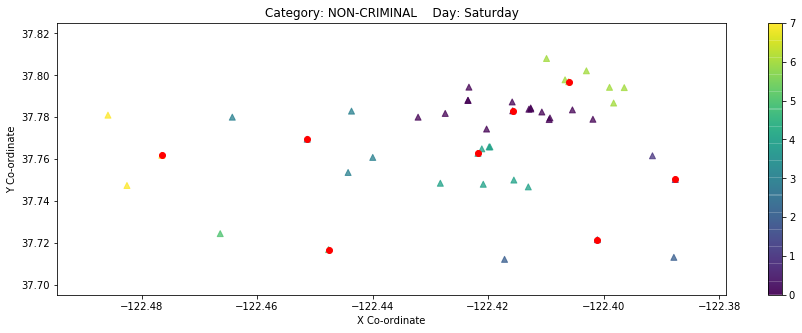

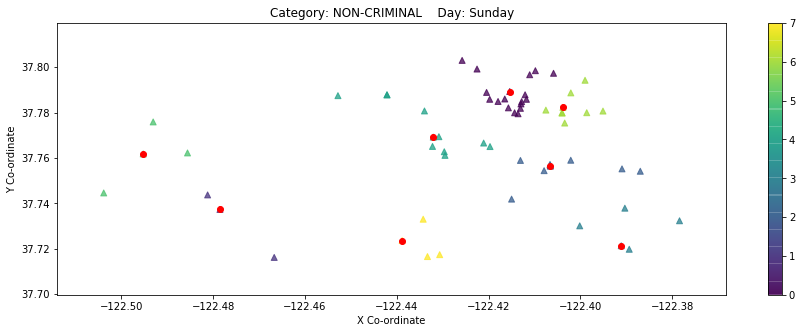

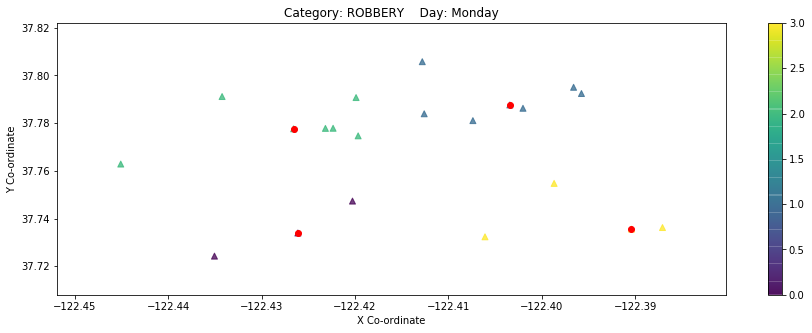

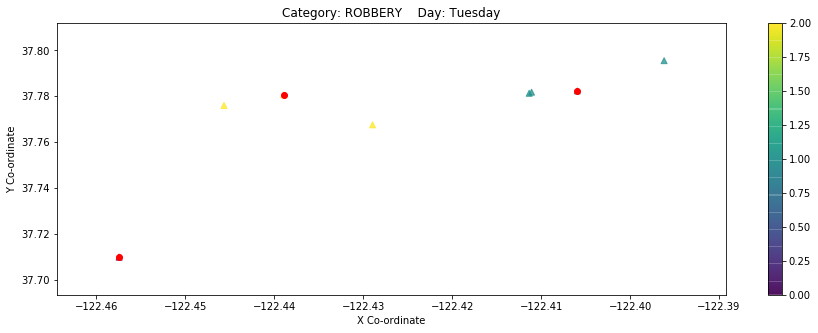

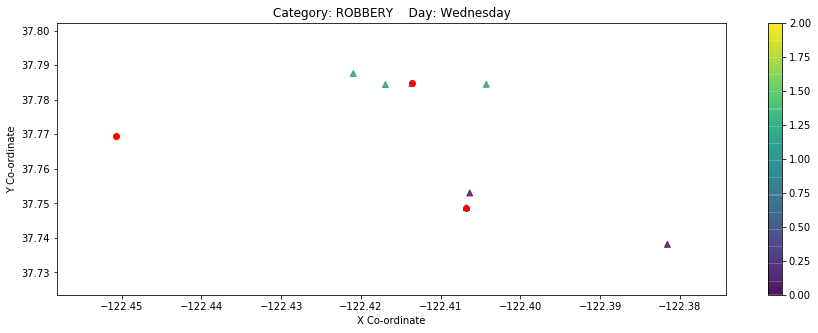

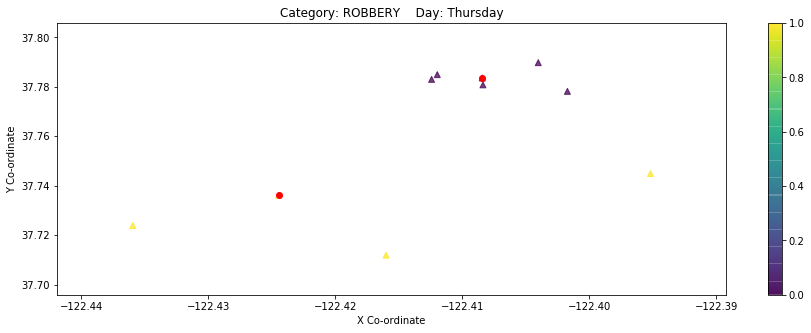

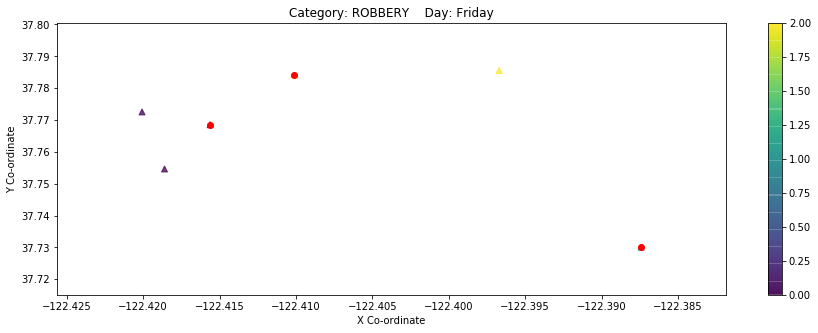

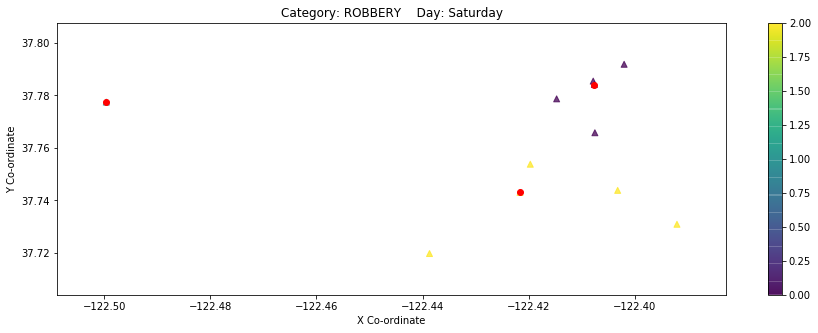

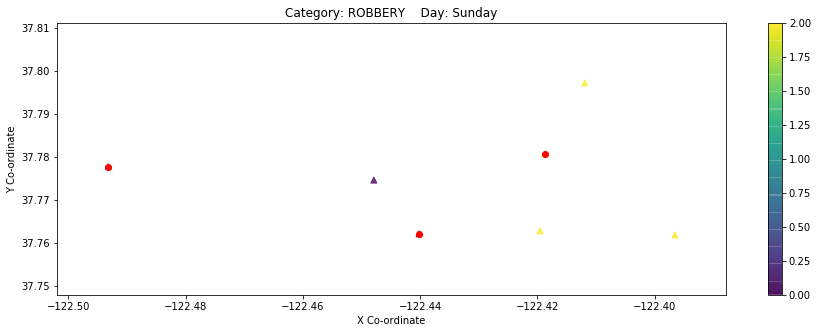

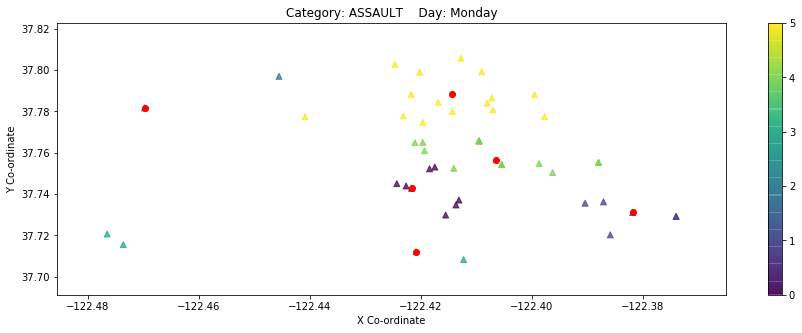

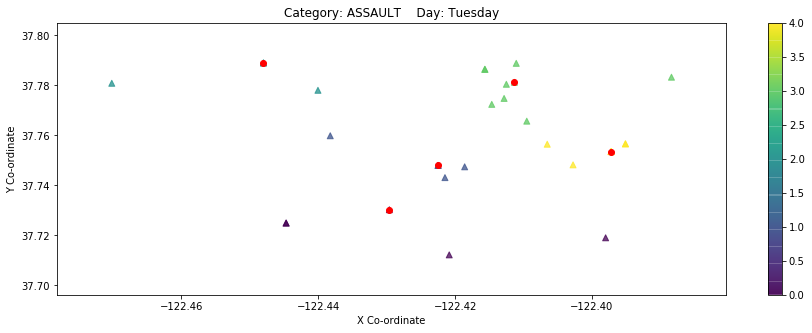

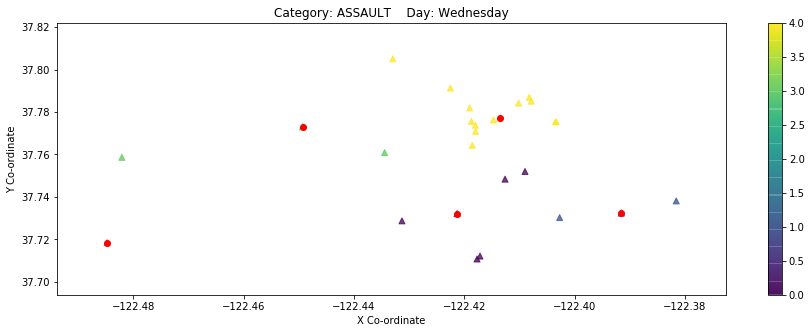

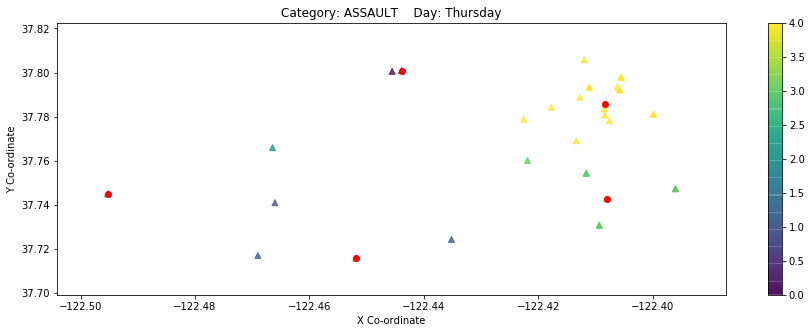

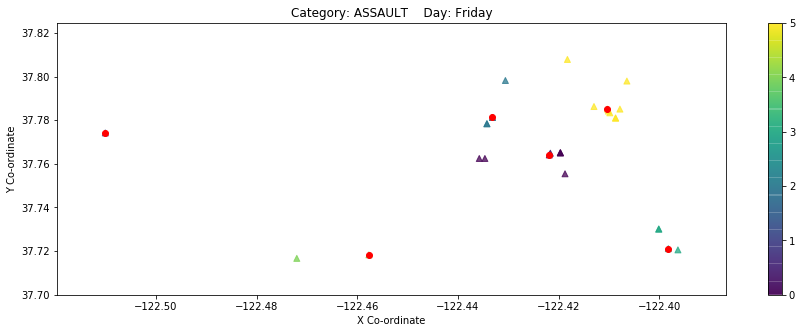

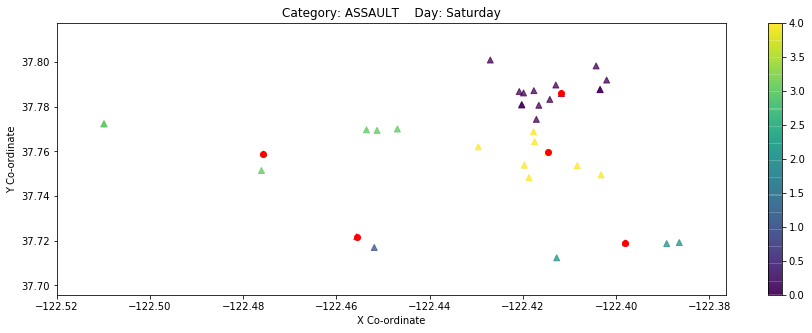

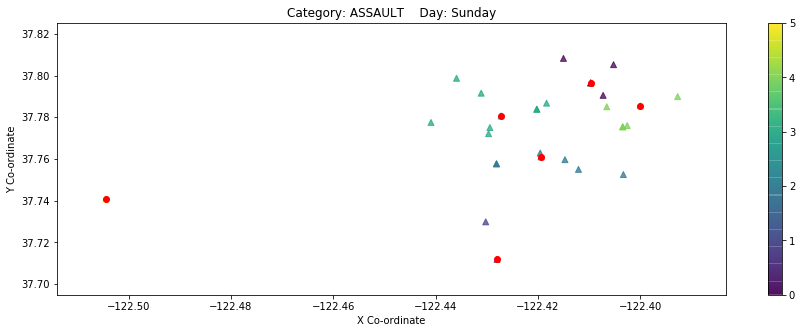

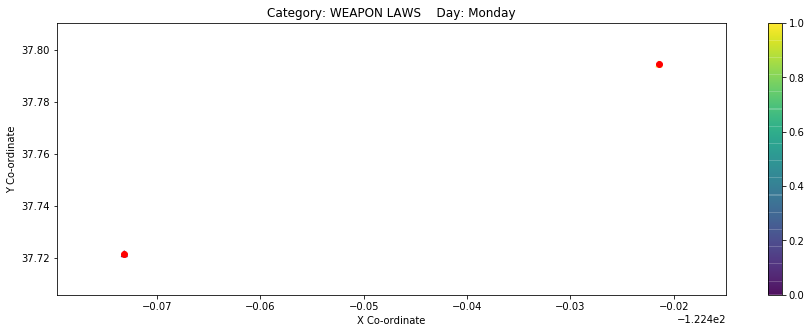

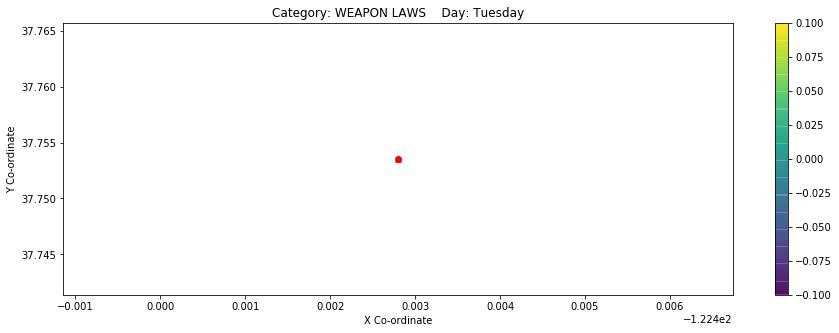

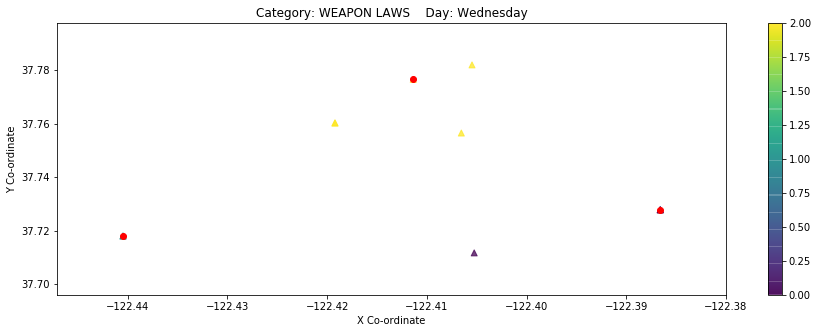

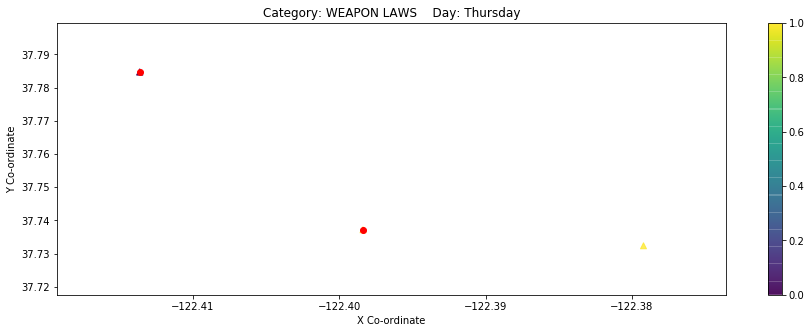

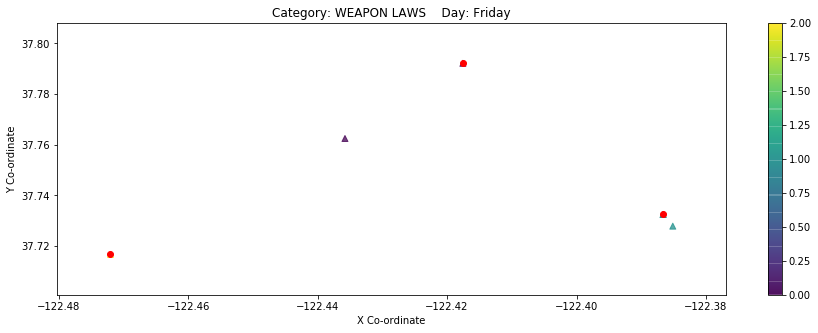

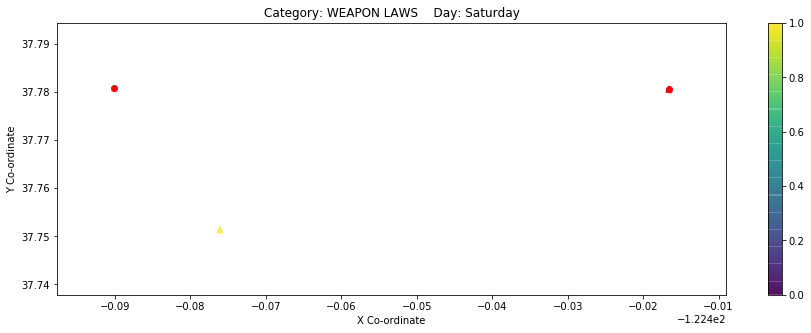

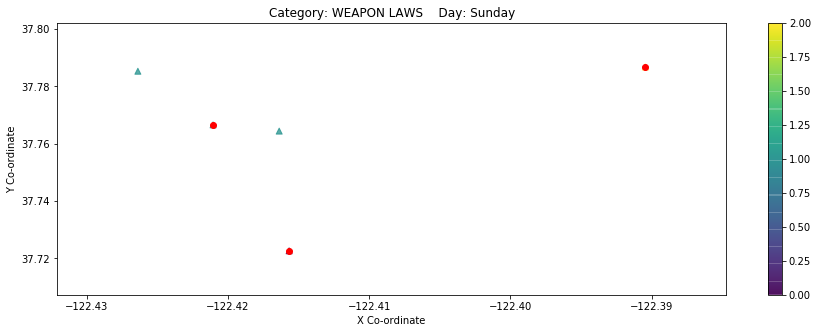

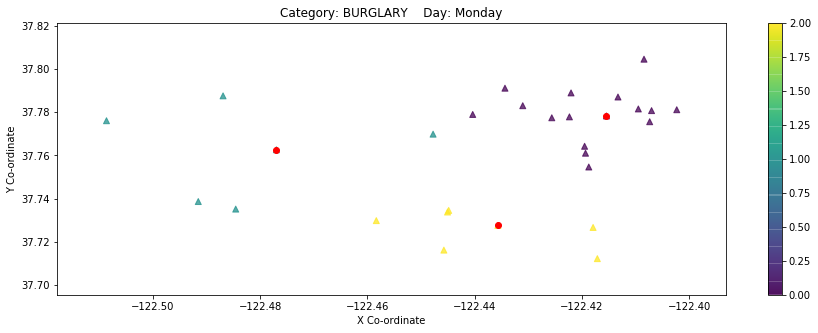

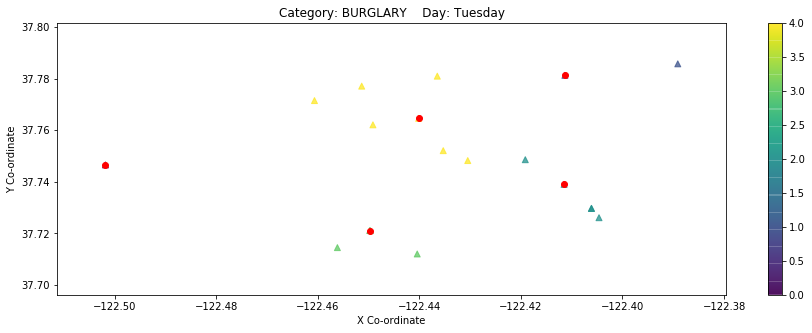

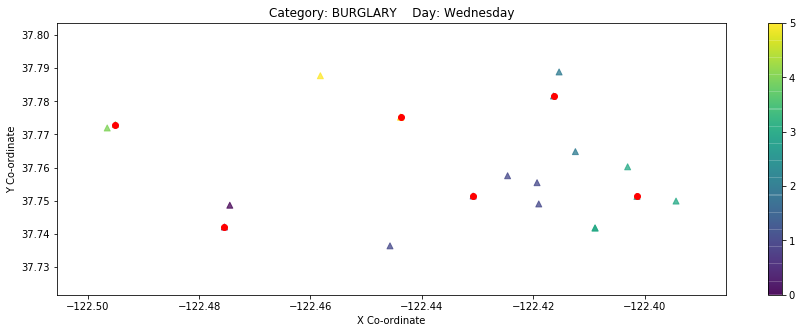

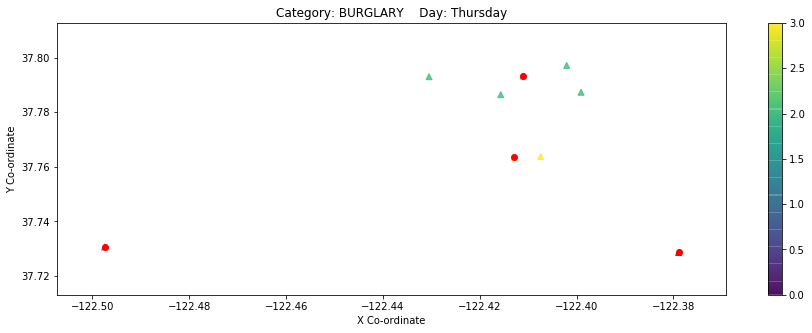

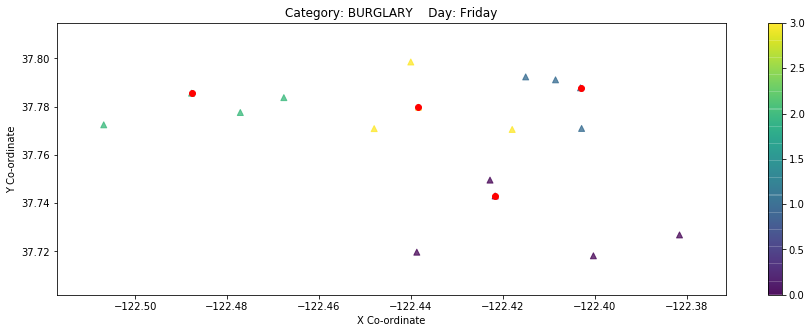

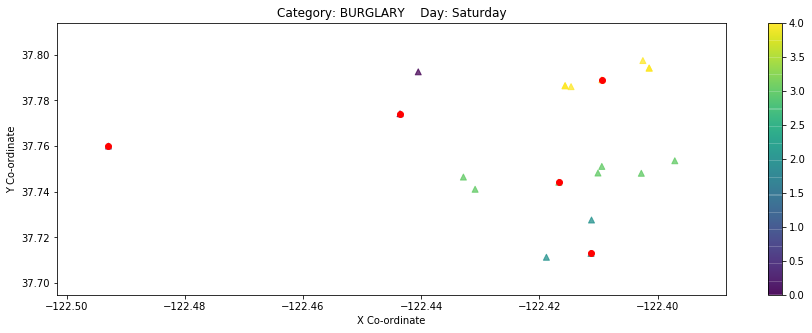

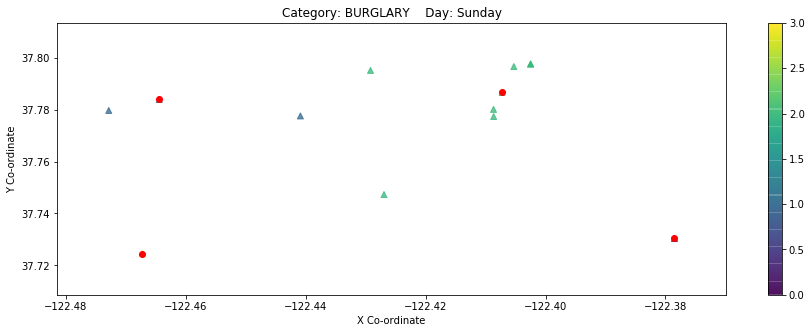

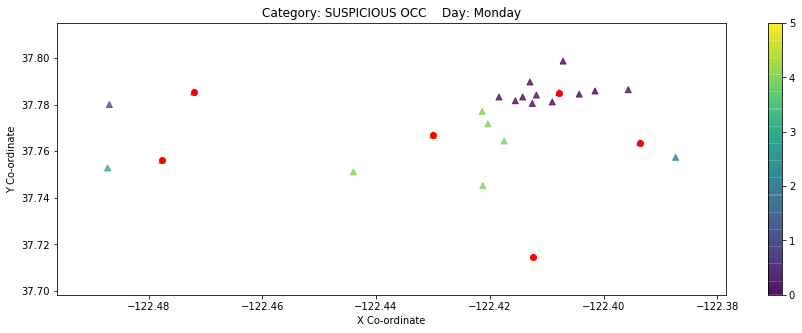

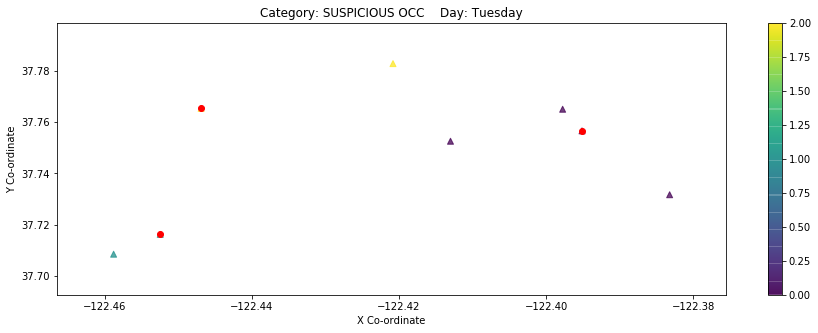

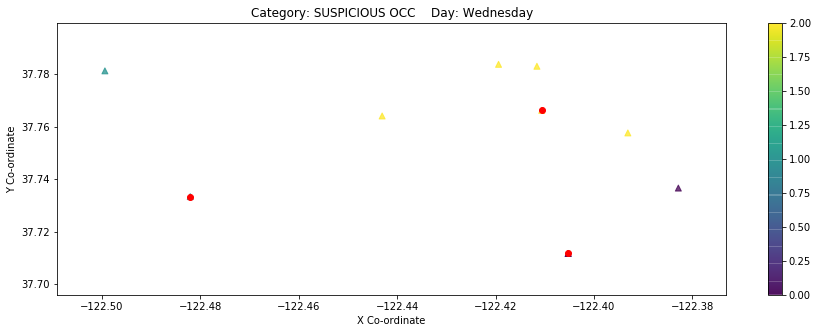

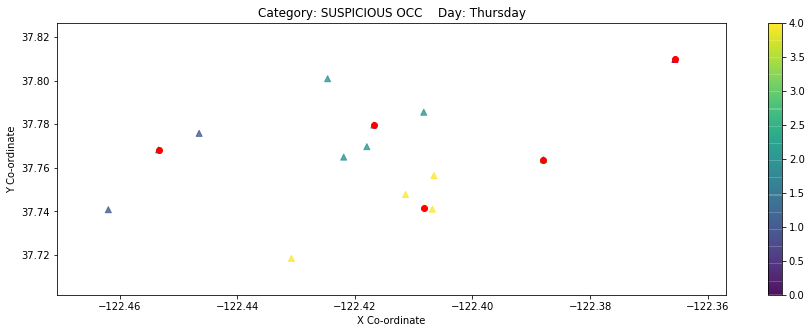

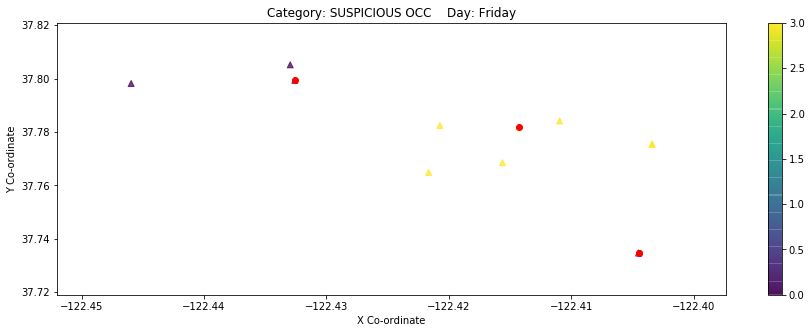

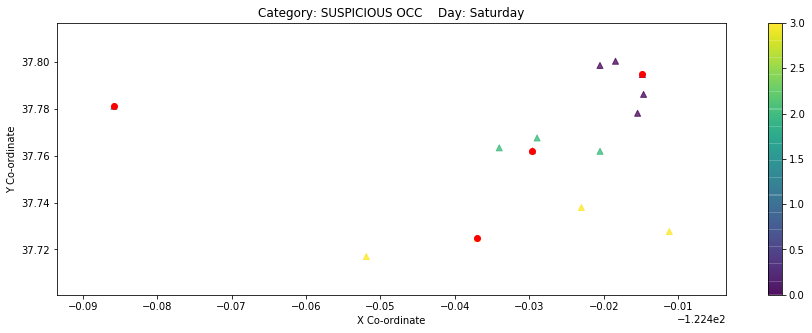

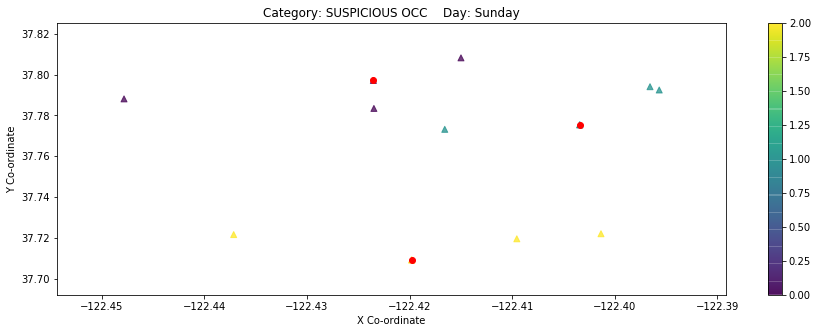

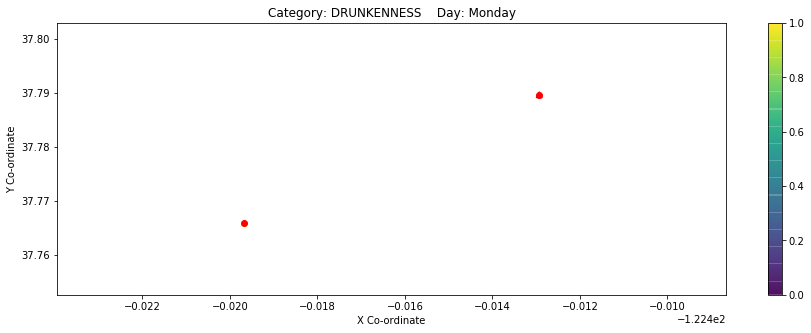

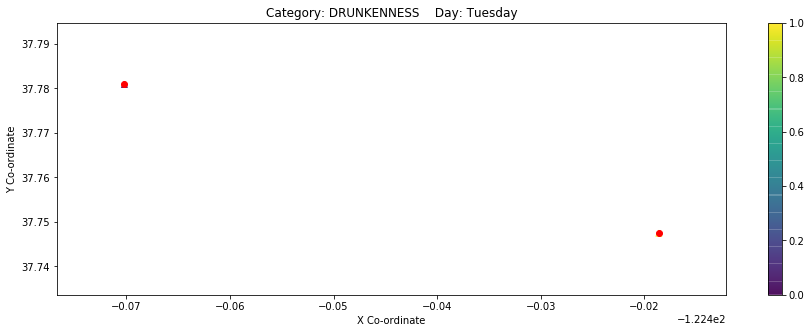

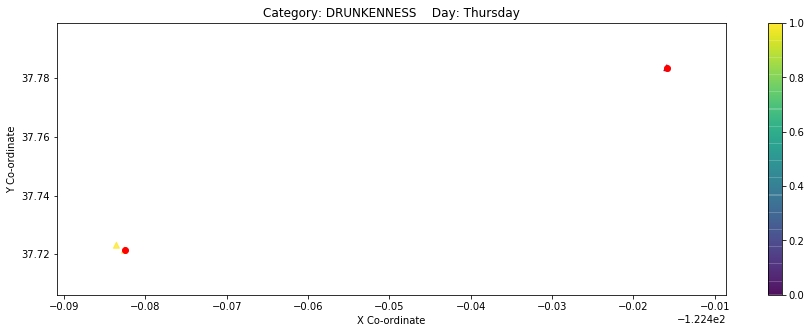

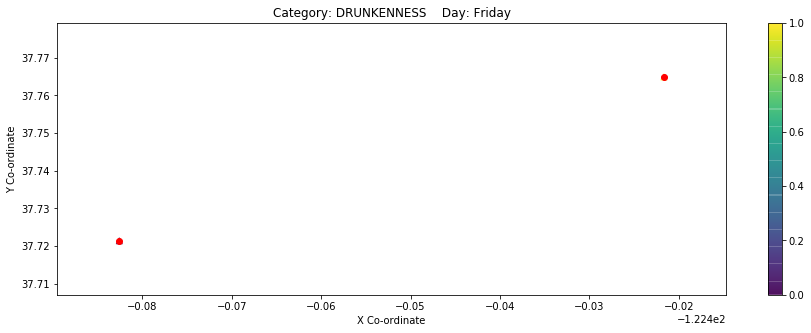

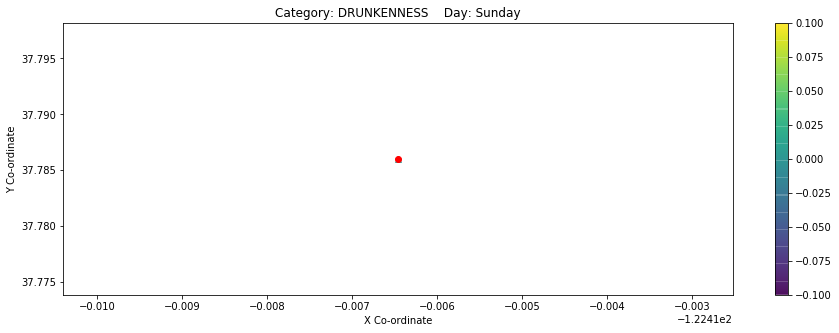

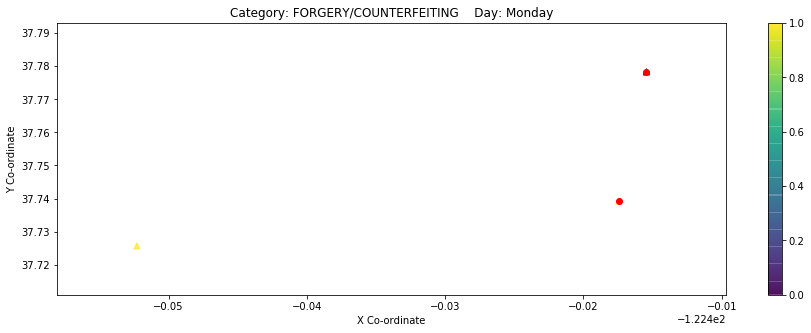

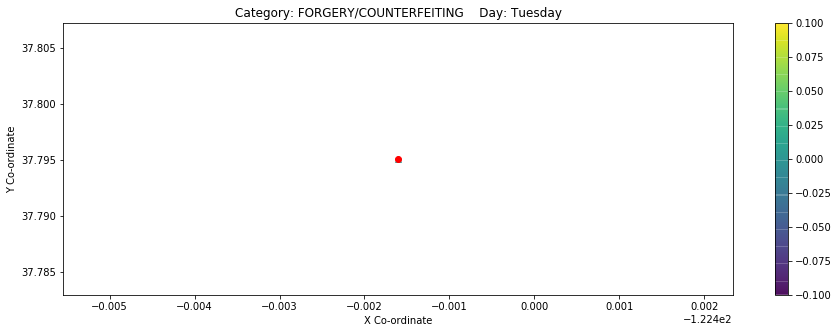

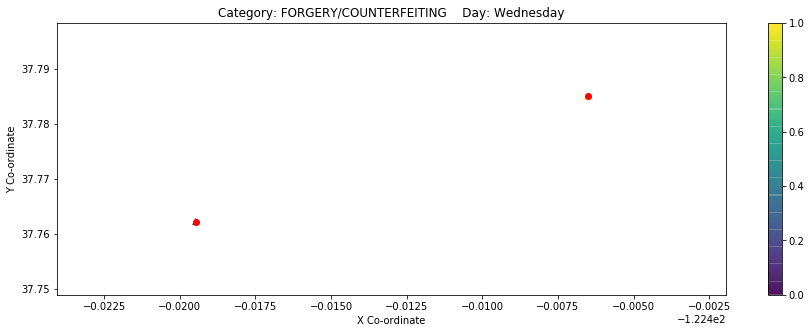

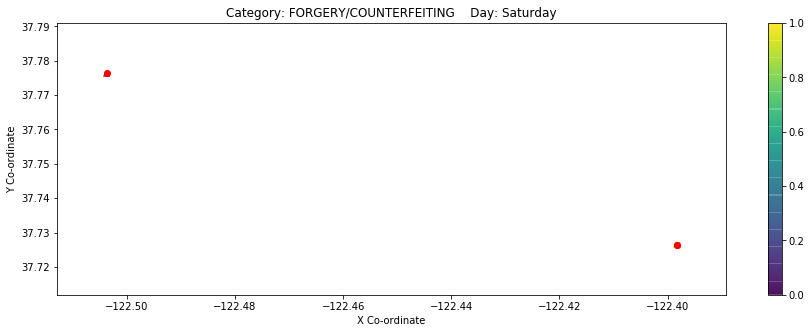

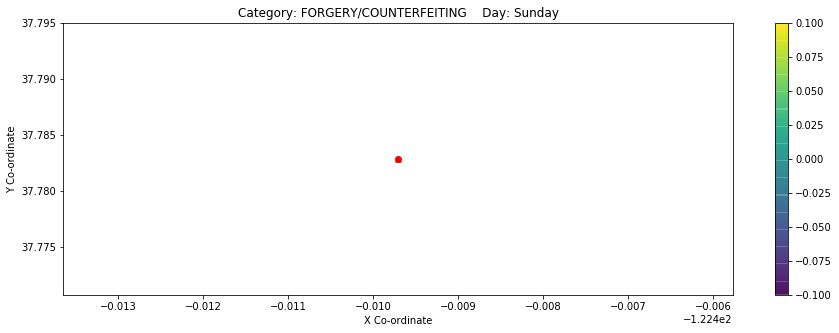

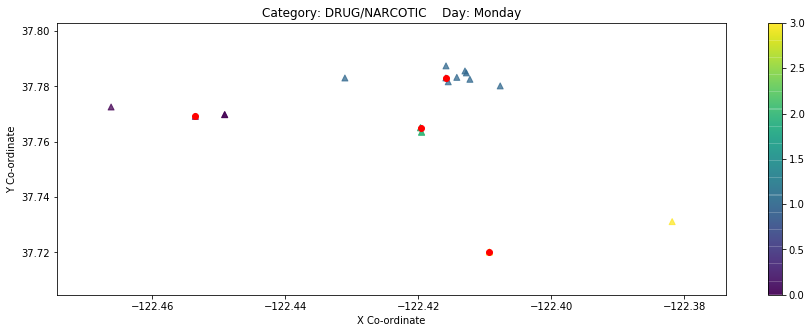

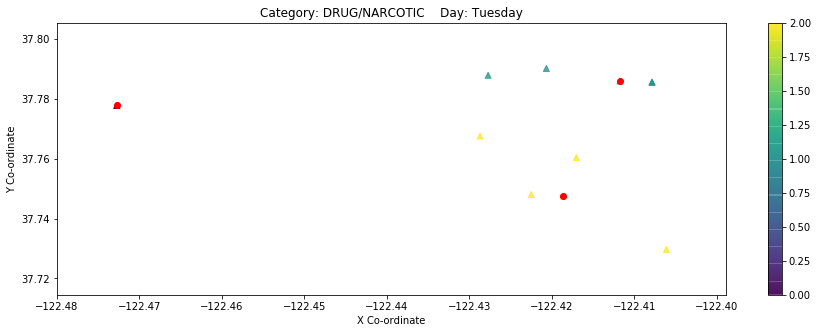

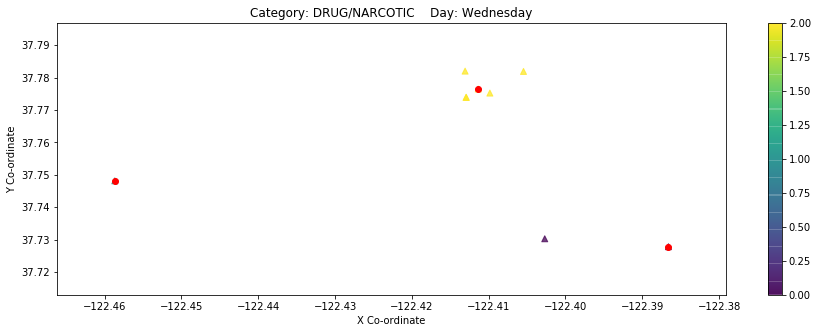

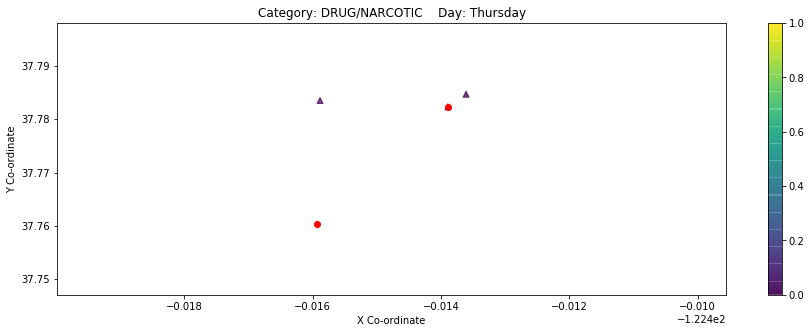

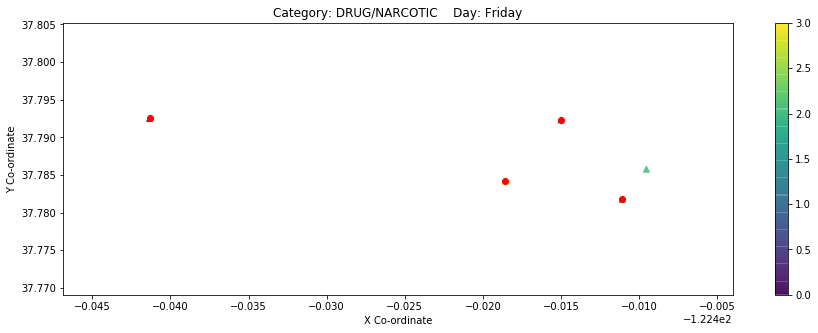

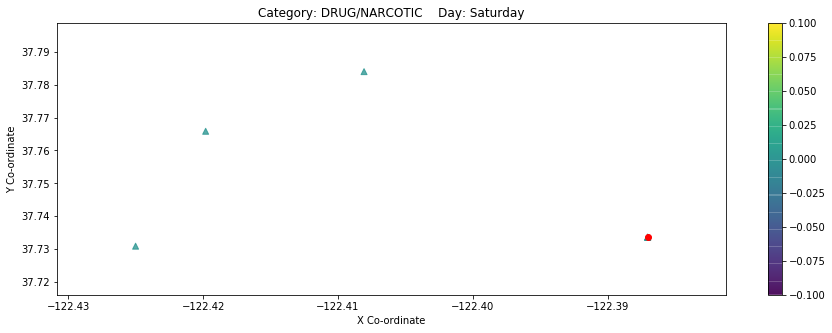

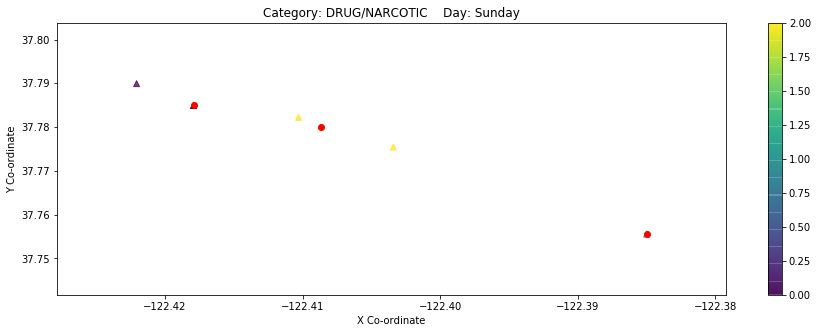

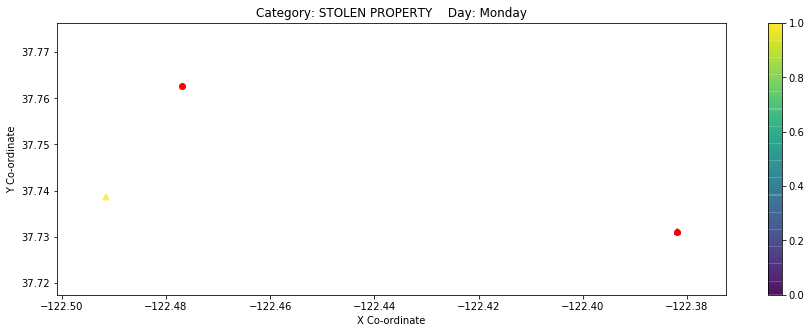

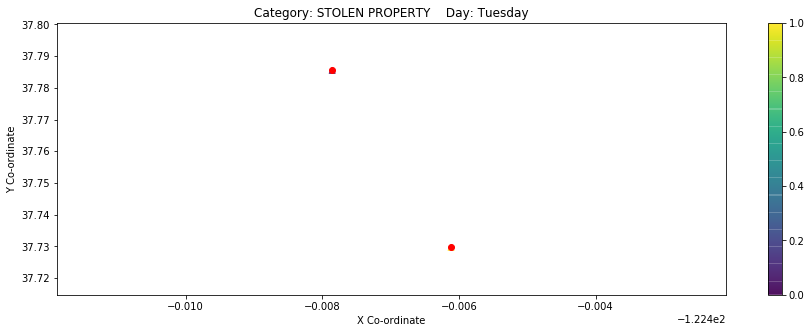

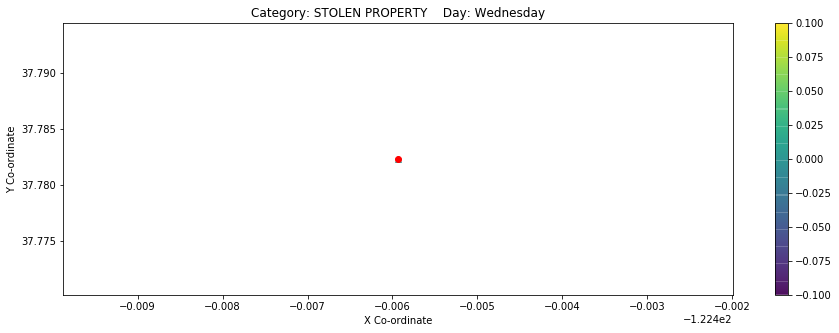

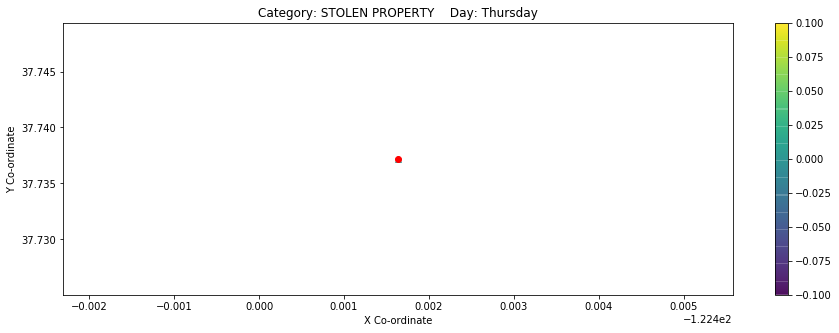

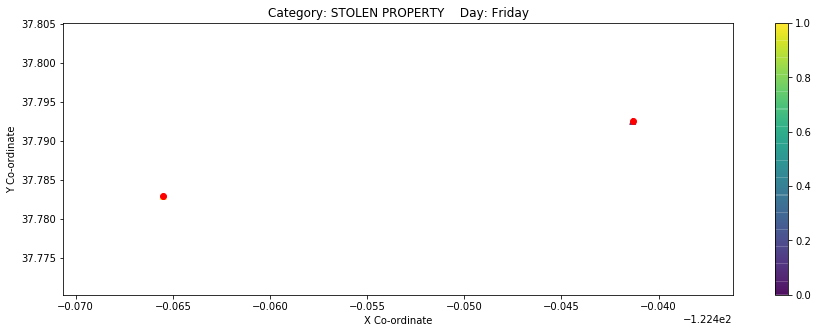

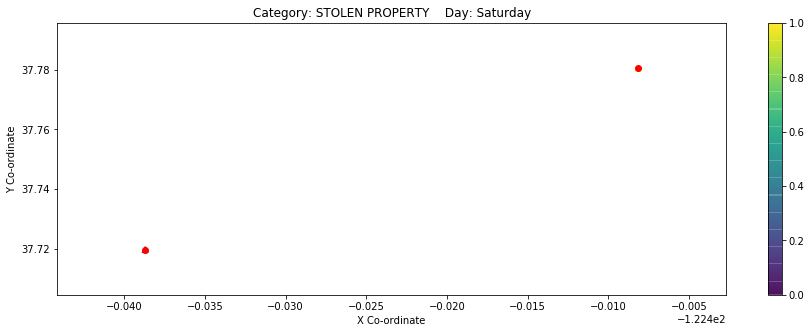

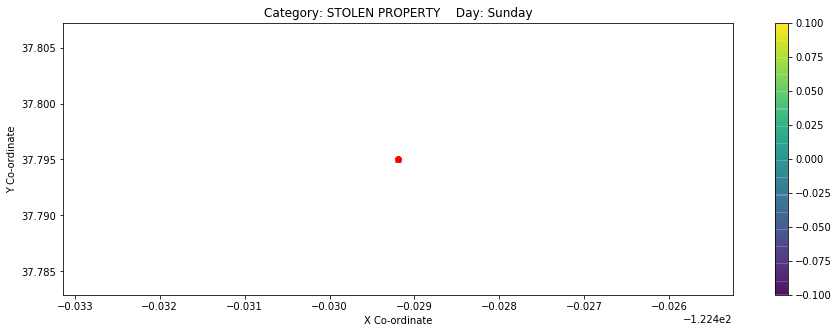

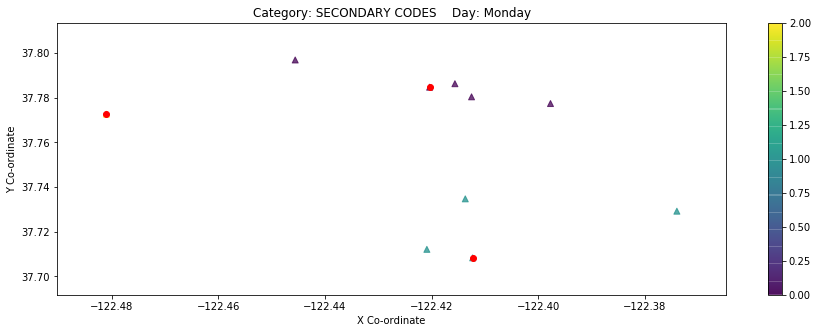

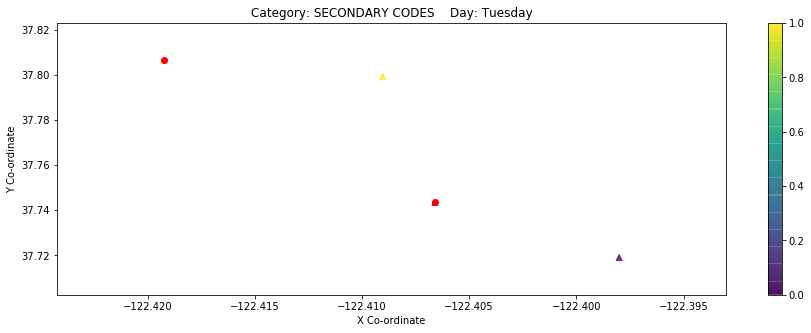

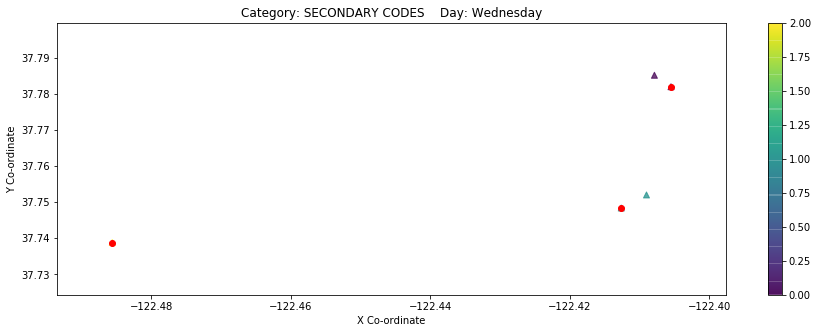

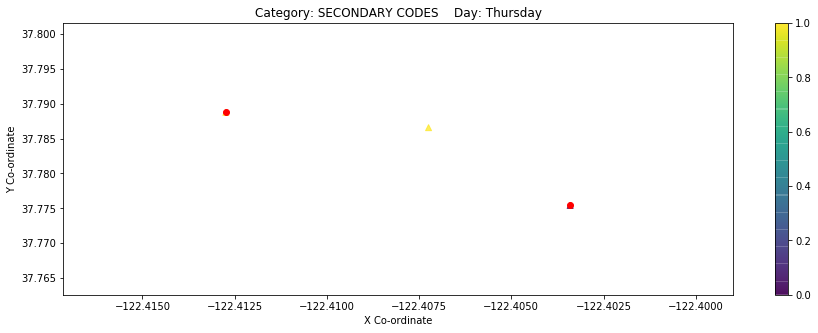

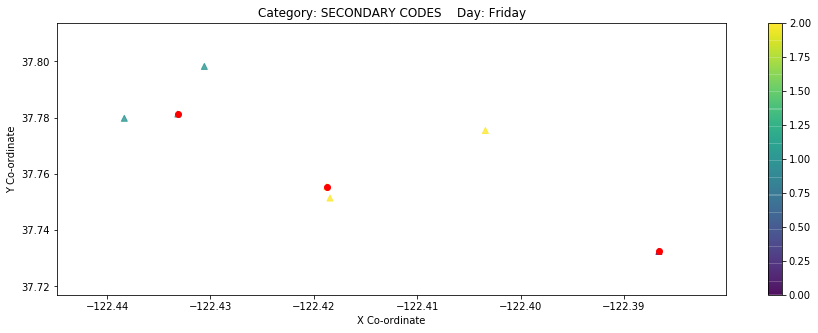

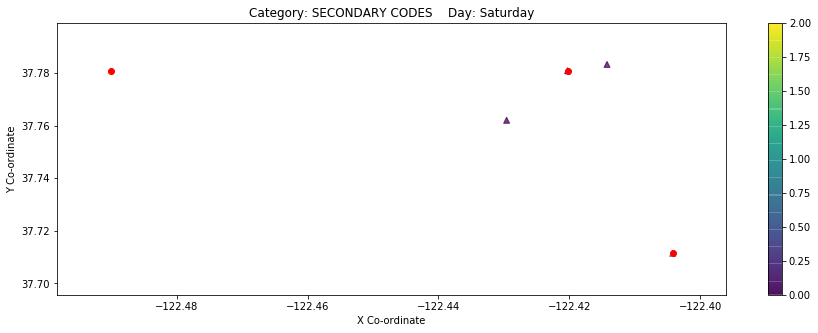

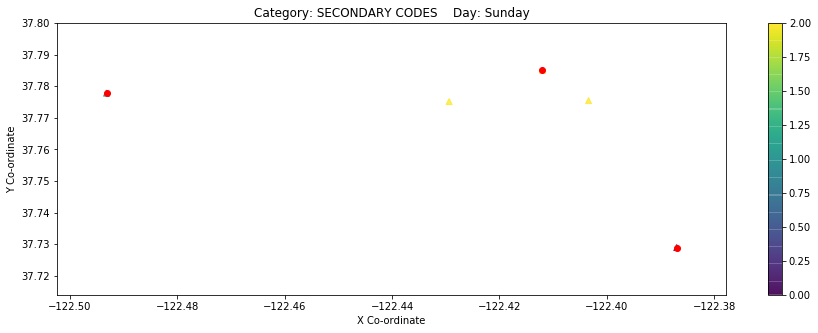

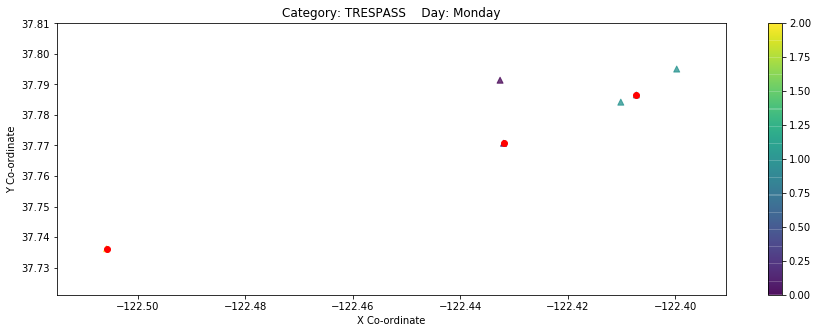

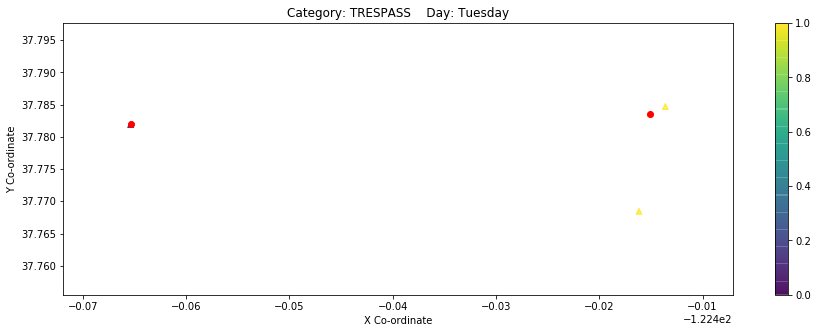

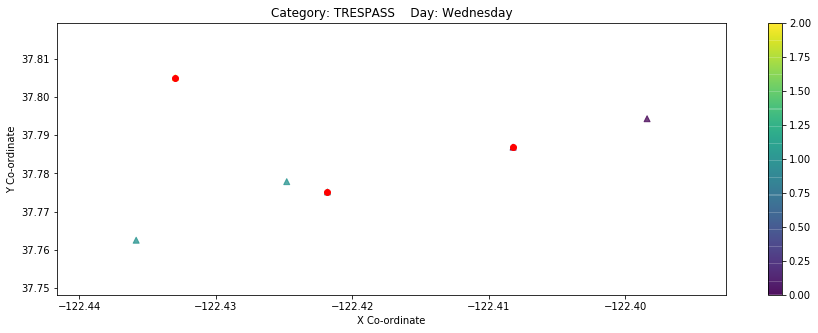

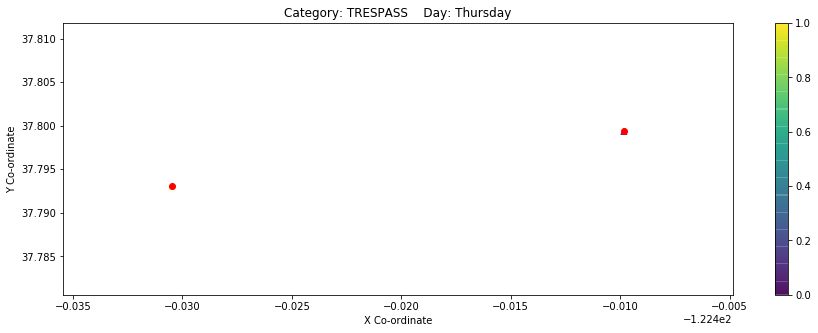

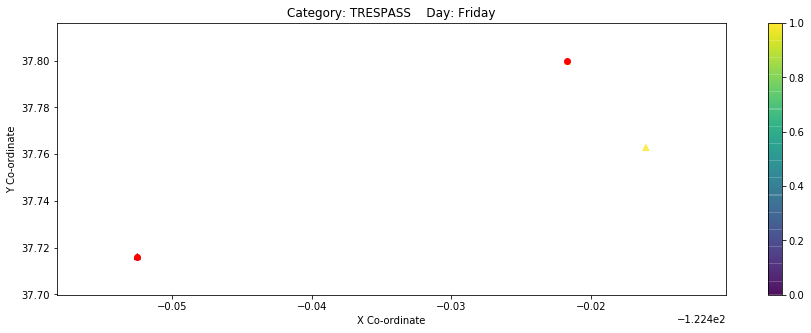

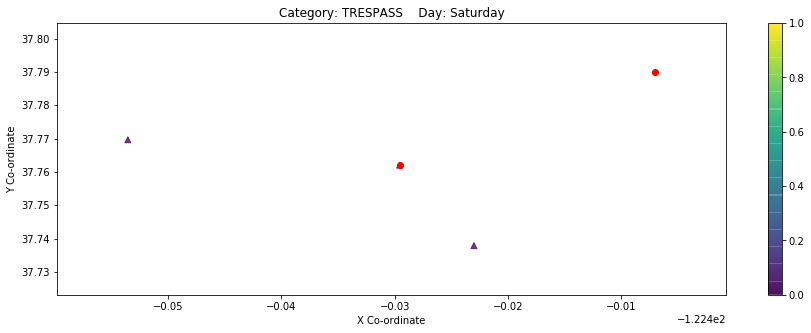

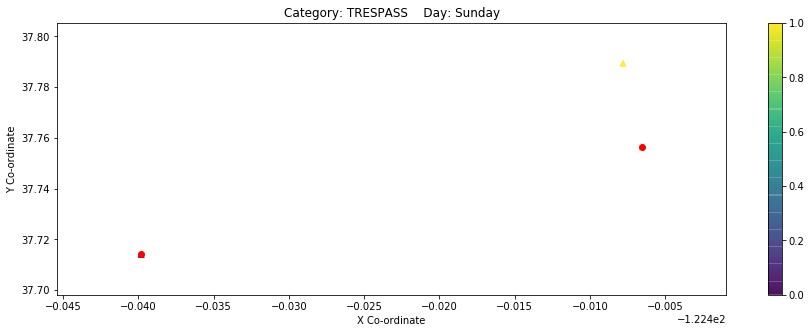

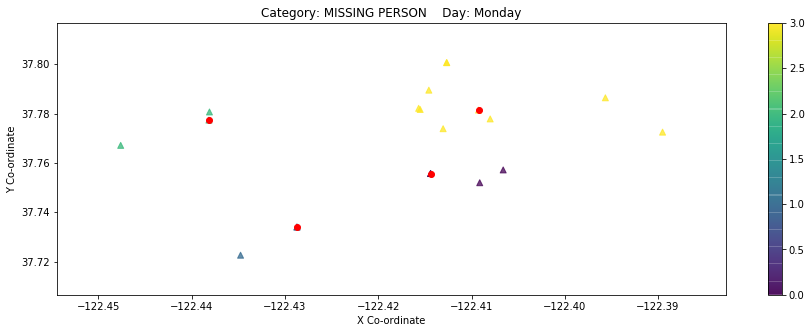

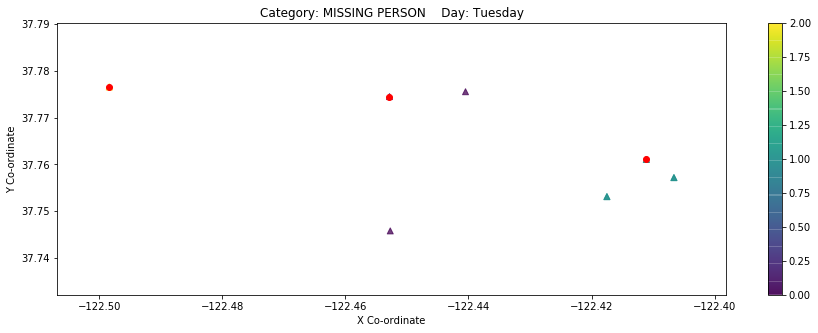

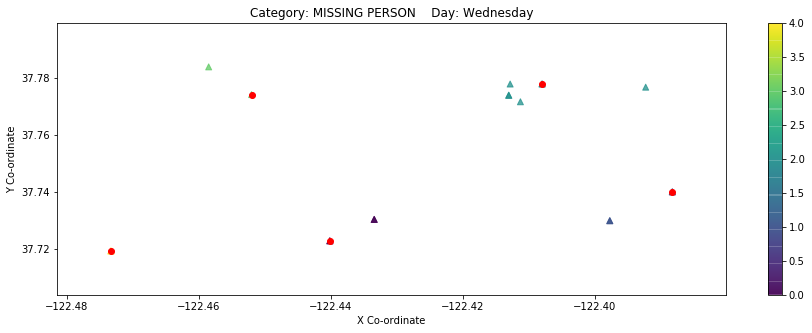

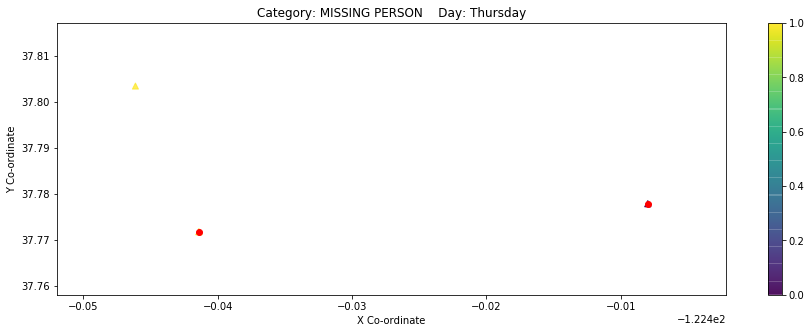

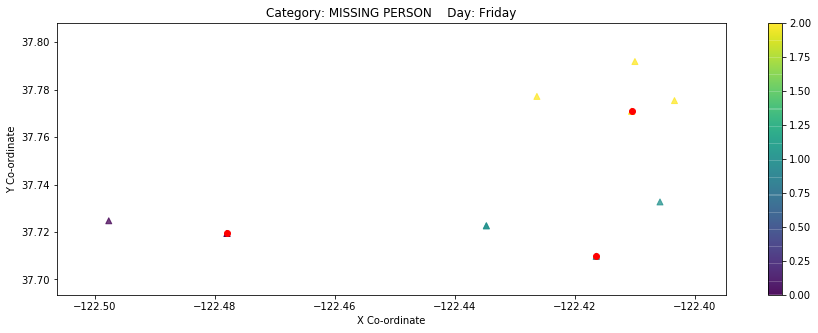

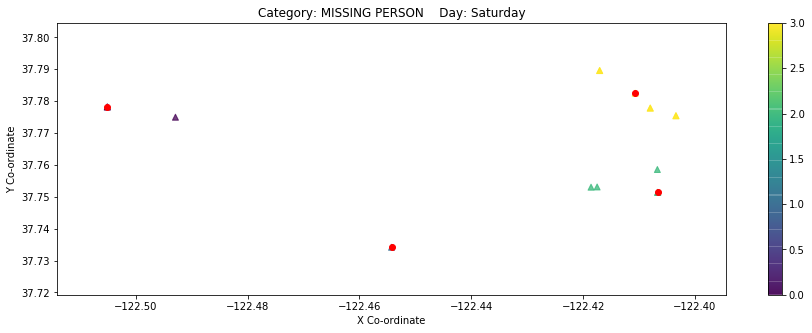

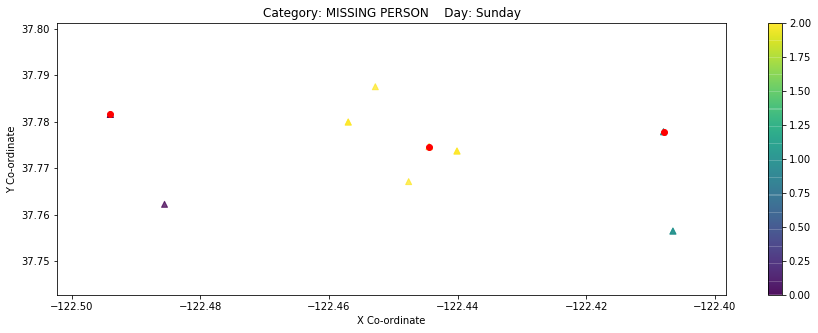

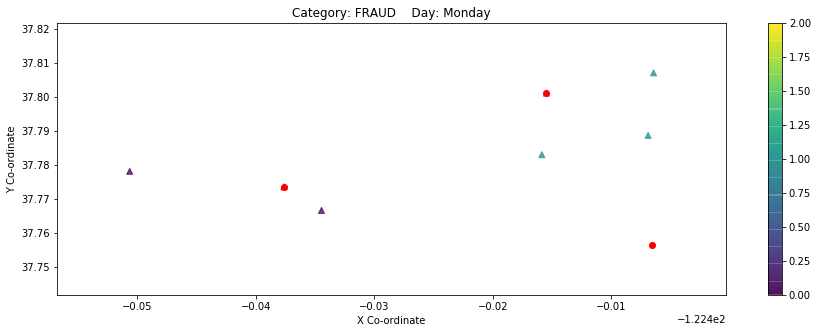

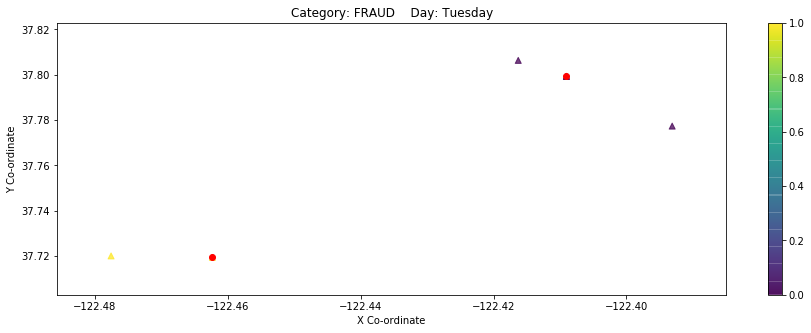

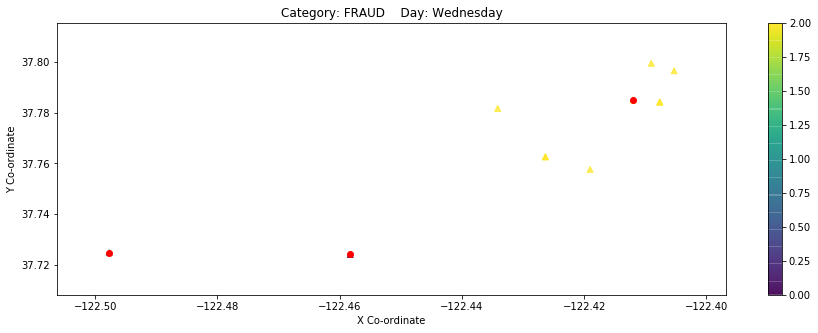

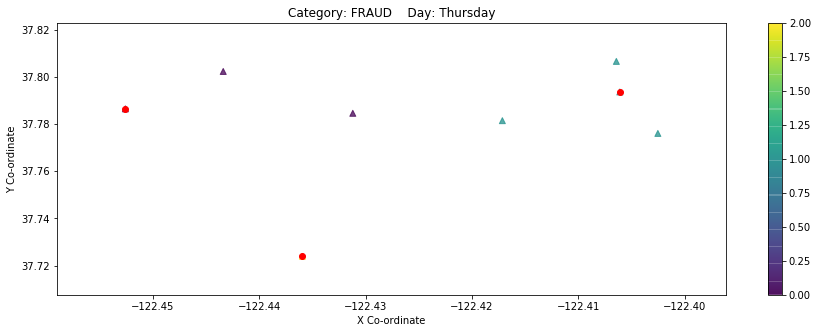

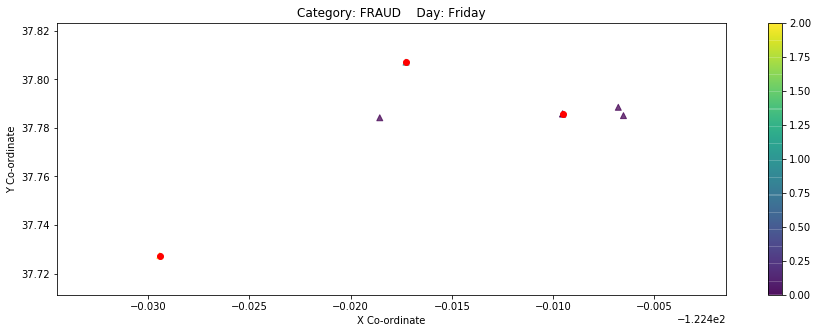

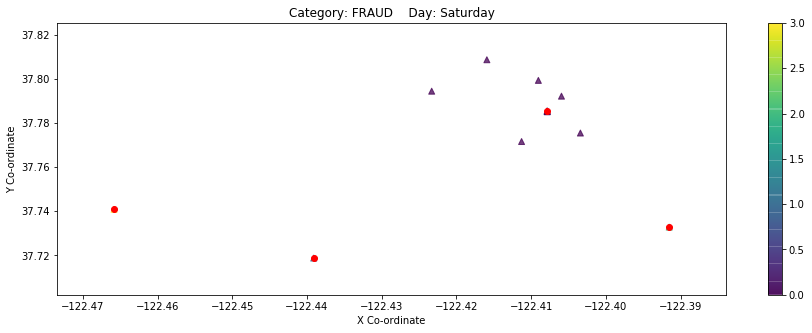

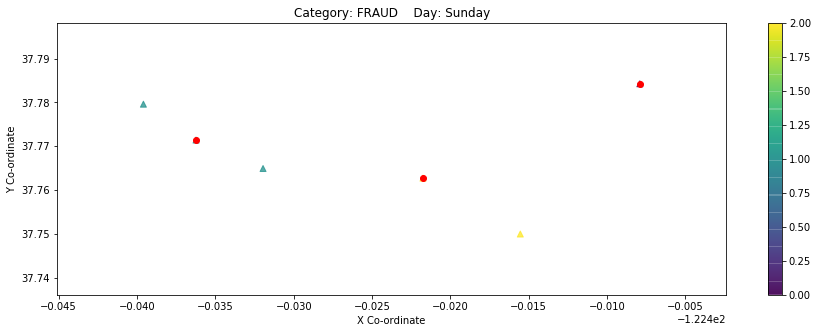

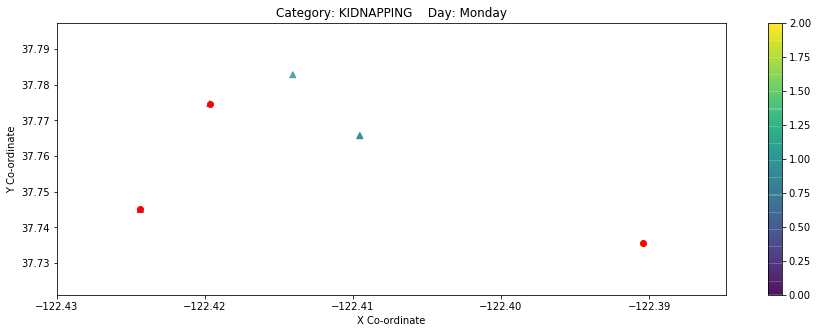

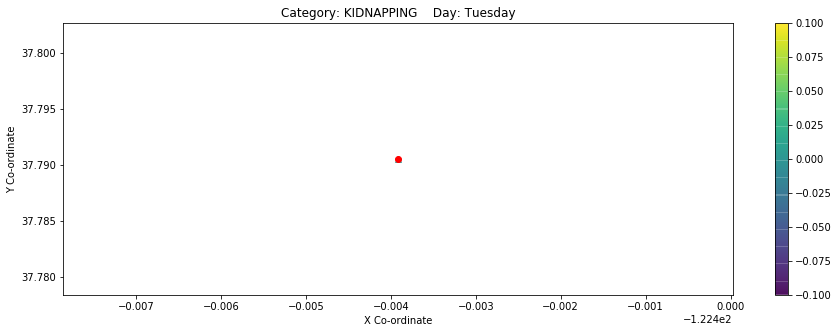

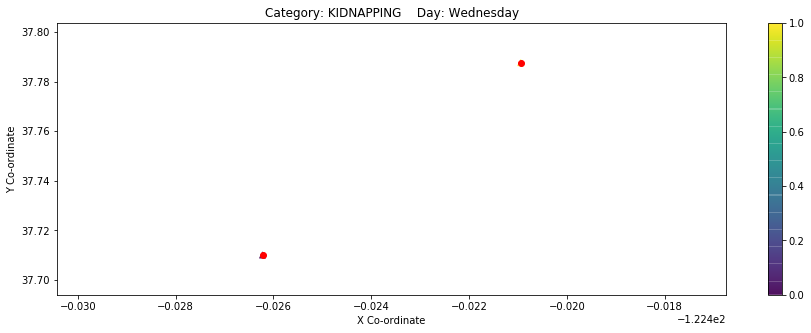

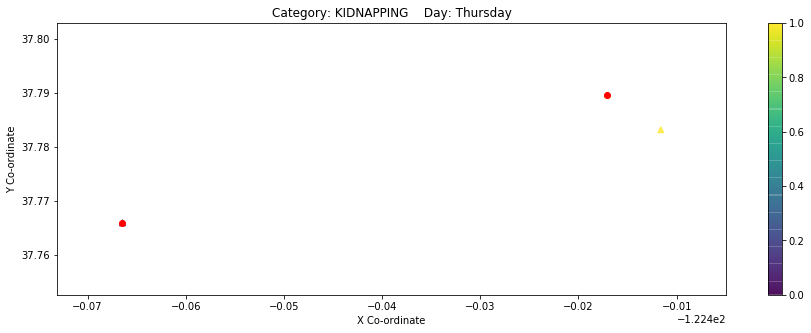

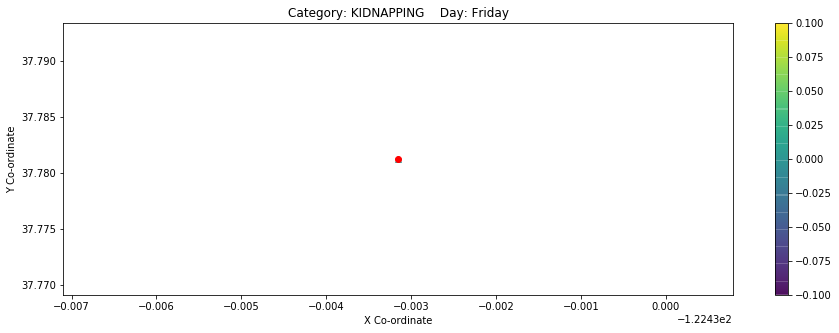

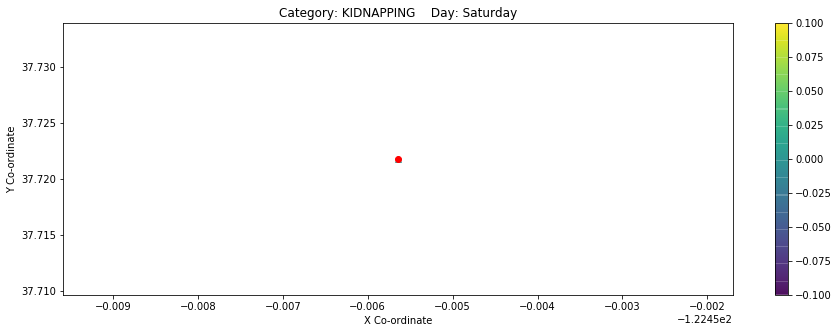

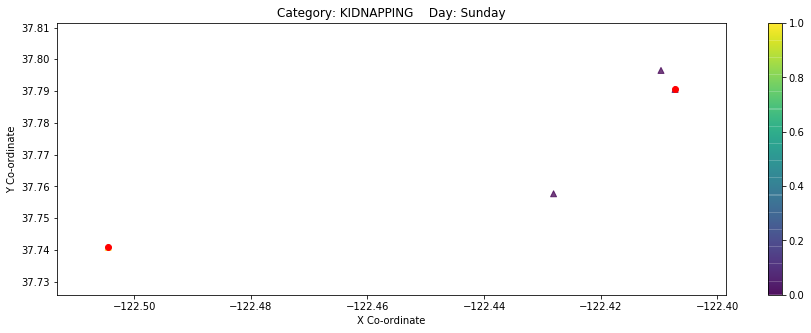

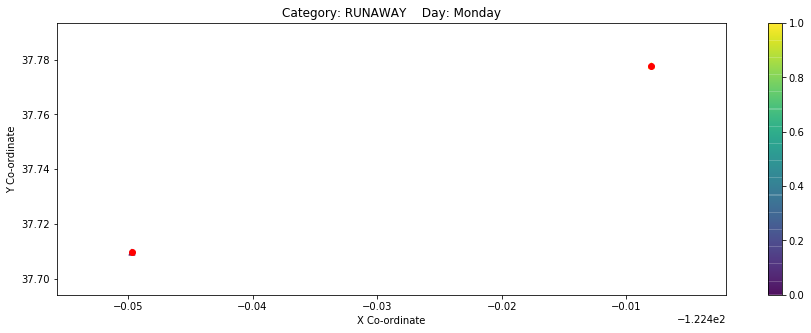

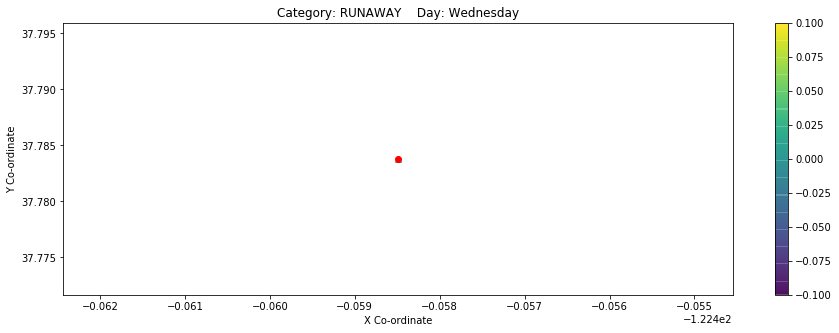

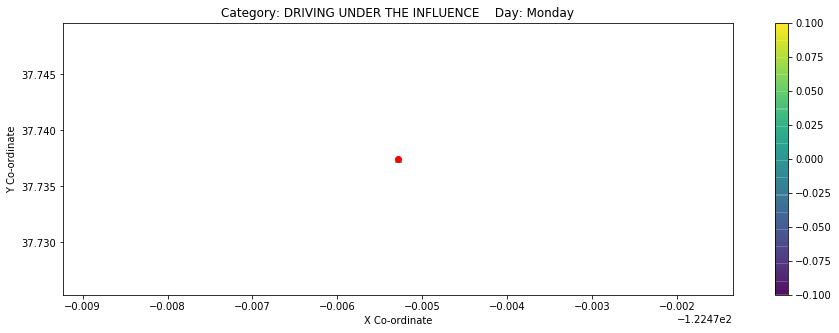

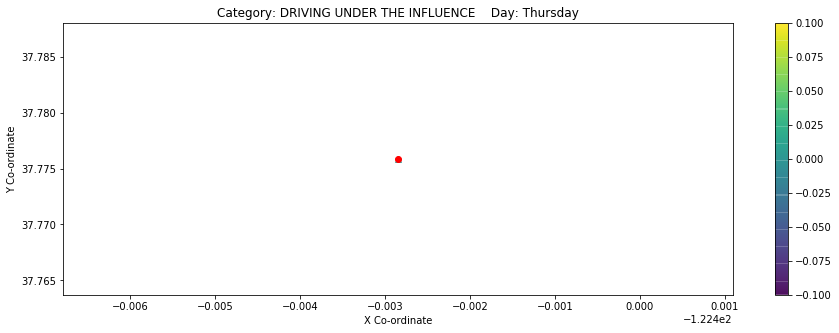

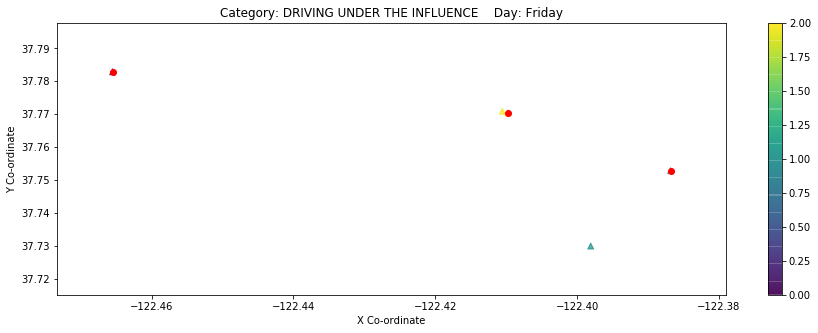

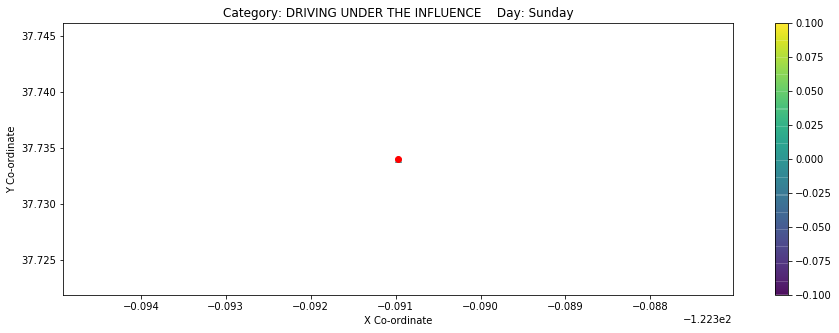

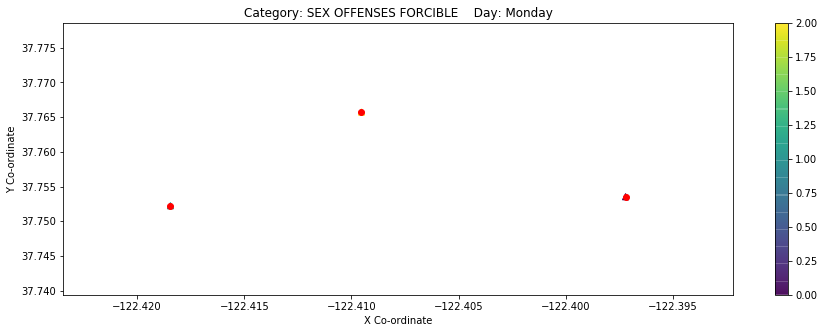

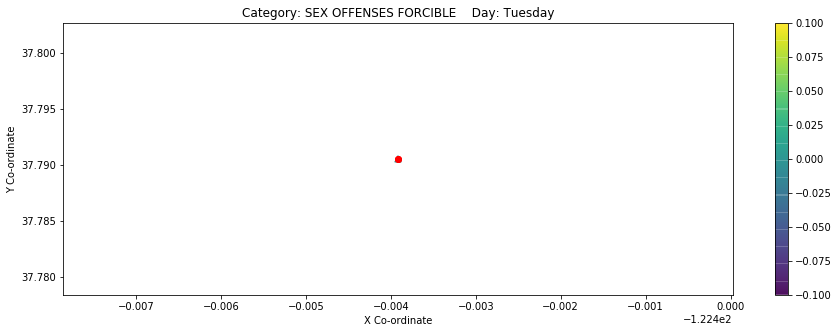

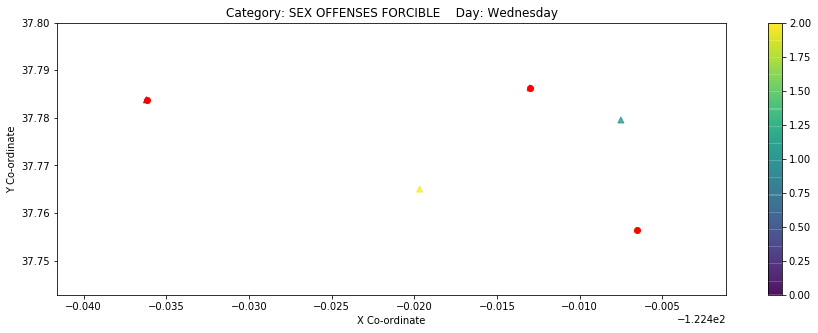

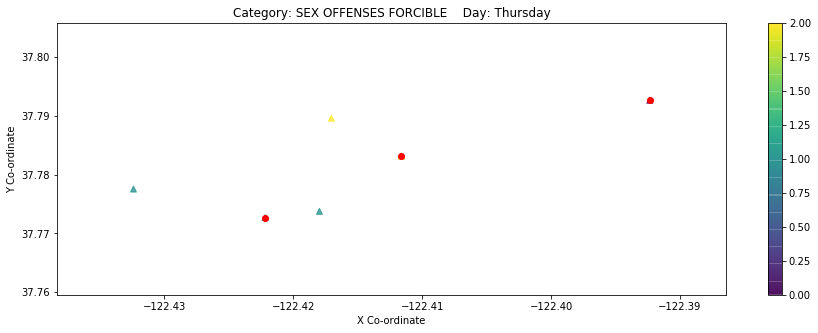

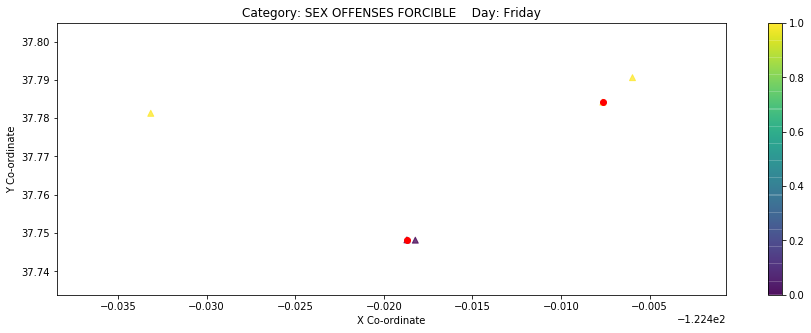

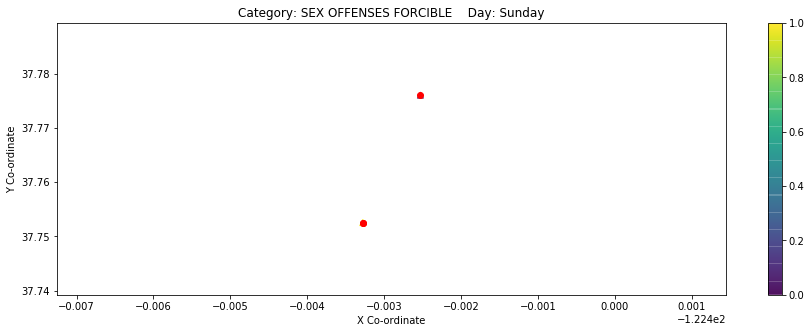

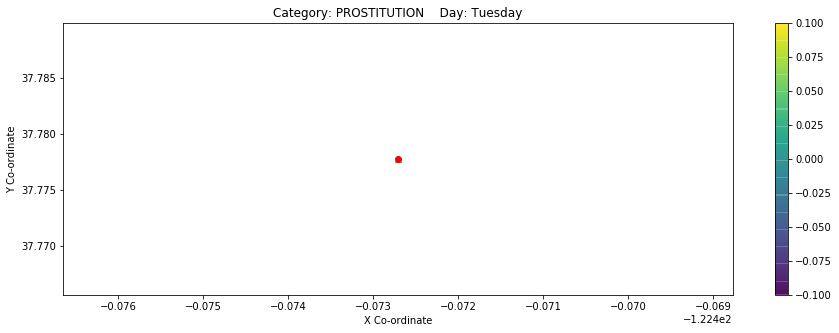

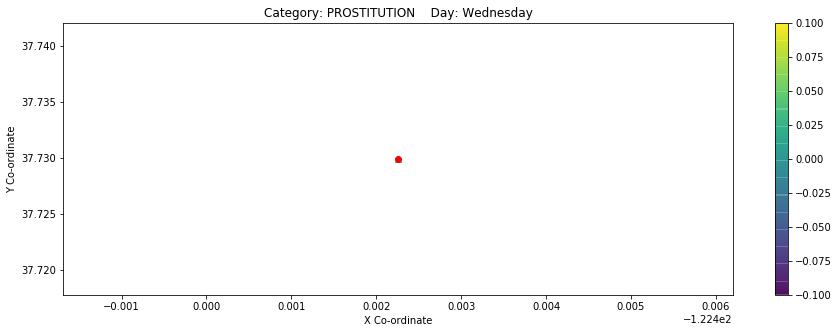

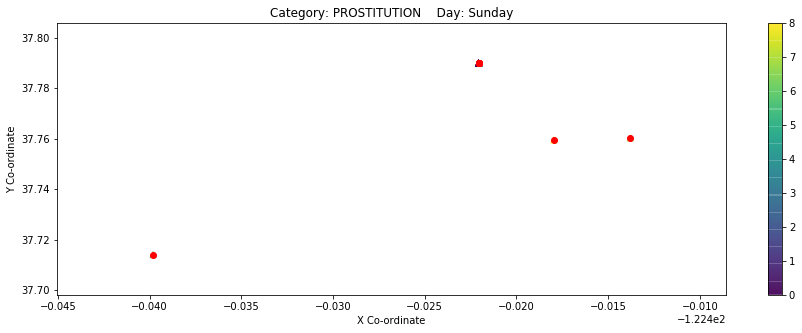

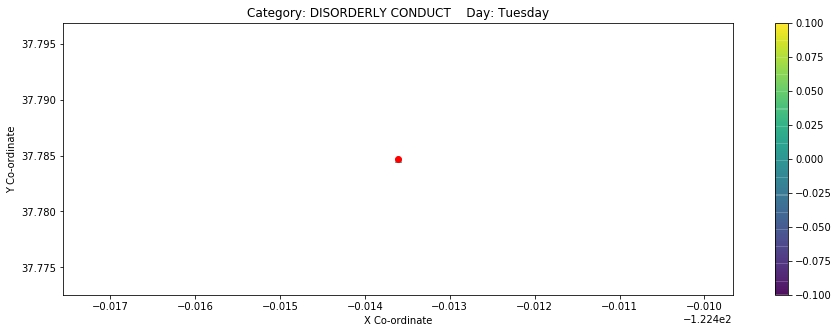

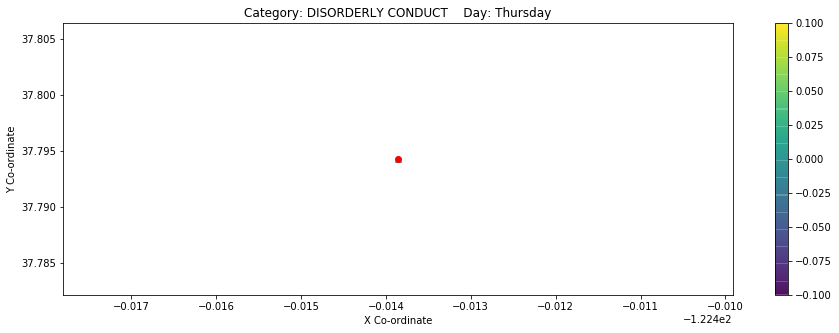

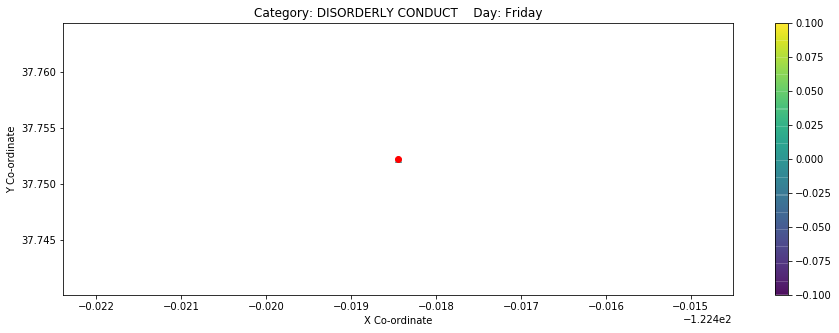

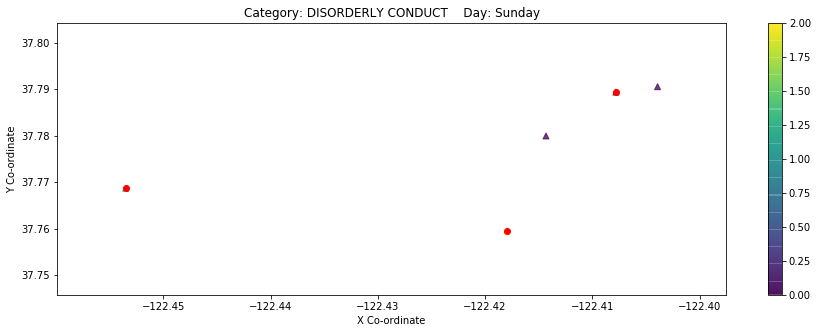

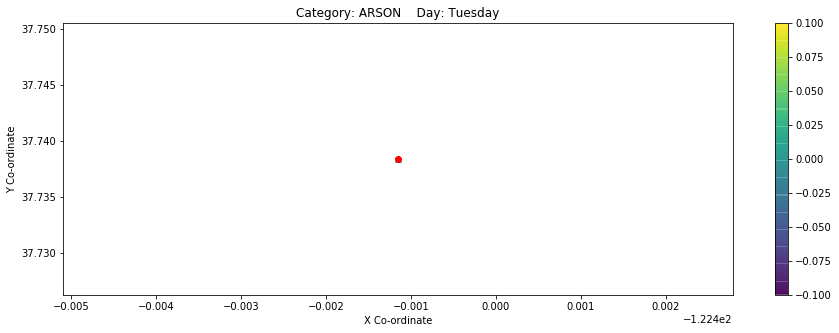

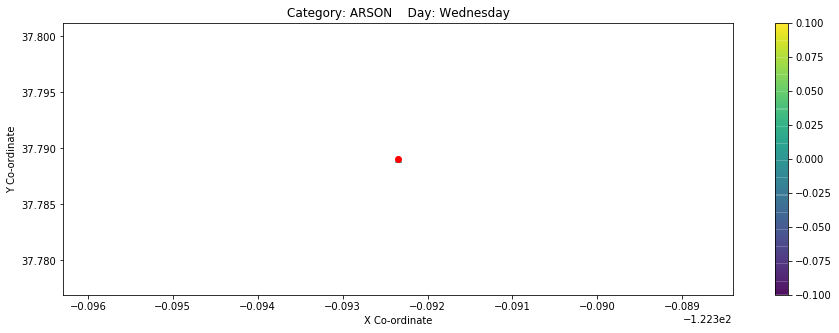

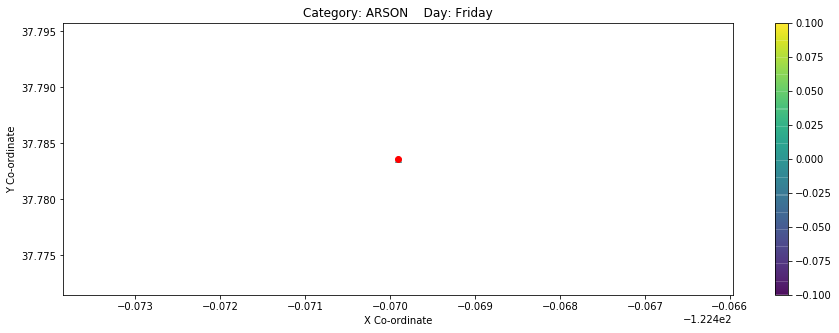

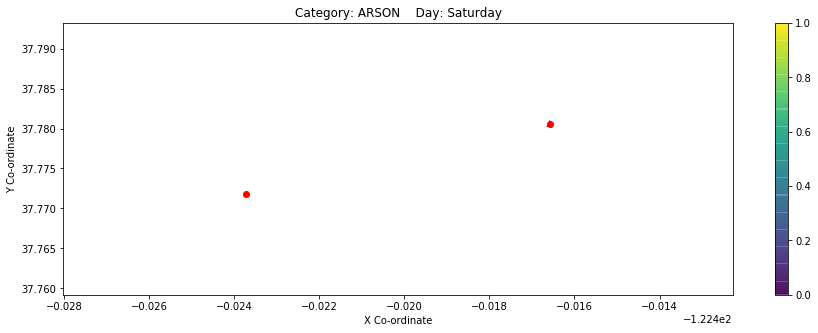

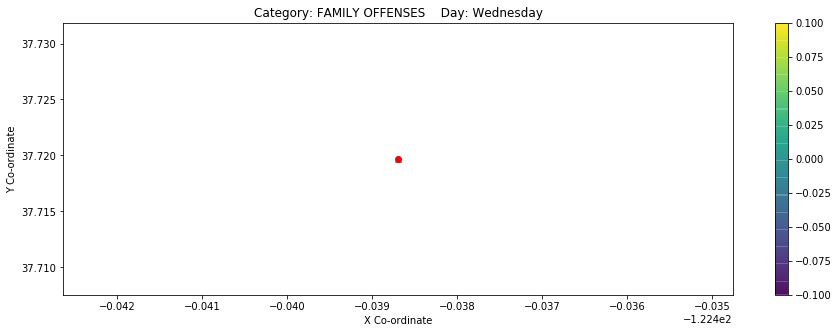

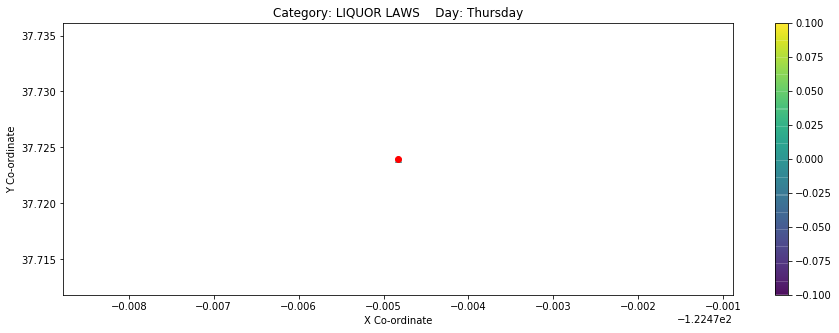

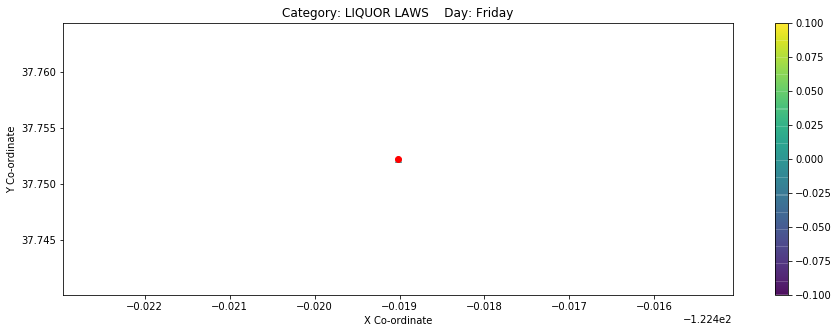

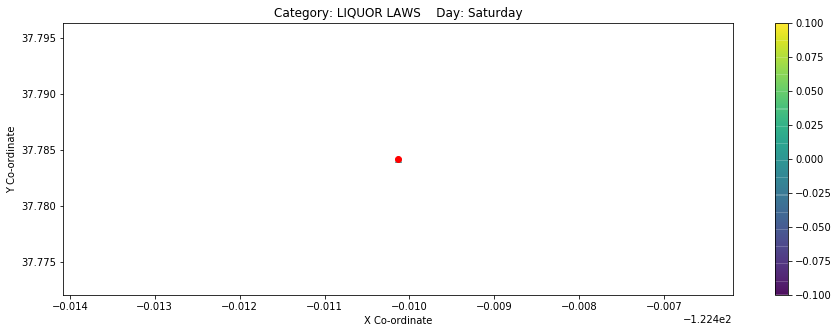

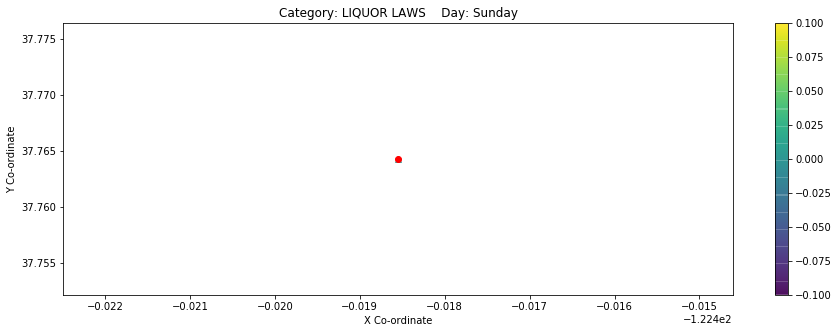

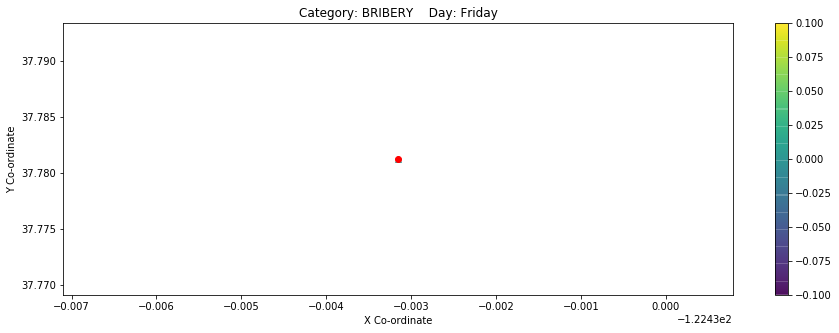

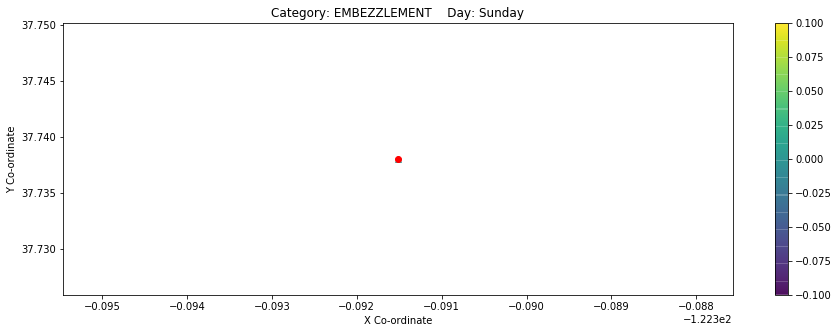

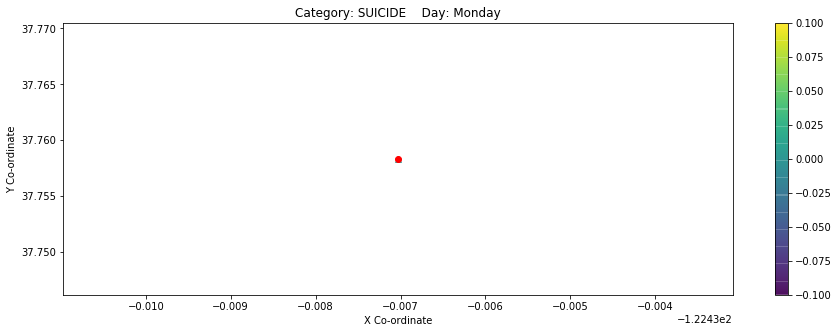

In [9]:
# Scatter plot of offences w.r.t day (clustering: per category based)

def weekdayCrime2(temp, day, crime):
    day_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    clust_labels2, cent2 = doAffinity(temp)
    affinity = pd.DataFrame(clust_labels2)
    temp.insert((temp.shape[1]),'affinity',affinity)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(temp['X'], temp['Y'], c = affinity[0],  marker='^' , alpha=0.75)
    title = "Category: "+ crime + "    Day: "+ day_index[day]
    ax.set_title(title)
    ax.set_xlabel('X Co-ordinate')
    ax.set_ylabel('Y Co-ordinate')
    plt.colorbar(scatter)
    #plt.figure()
    plt.scatter(cent2[:,2],cent2[:,3], marker='o', color='r')

def crimeCatDay(df, cat):
    Cat_Index = ['WARRANTS','OTHER OFFENSES','LARCENY/THEFT','VEHICLE THEFT','VANDALISM','NON-CRIMINAL','ROBBERY','ASSAULT','WEAPON LAWS','BURGLARY','SUSPICIOUS OCC','DRUNKENNESS','FORGERY/COUNTERFEITING','DRUG/NARCOTIC','STOLEN PROPERTY','SECONDARY CODES','TRESPASS','MISSING PERSON','FRAUD','KIDNAPPING','RUNAWAY','DRIVING UNDER THE INFLUENCE','SEX OFFENSES FORCIBLE','PROSTITUTION','DISORDERLY CONDUCT','ARSON','FAMILY OFFENSES','LIQUOR LAWS','BRIBERY','EMBEZZLEMENT','SUICIDE']
    for i in range(0,7):
        temp = df.loc[(df['DayOfWeek_id'] == i) & (df['category_id']==cat)]
        if(len(temp)>0):
            weekdayCrime2(temp, i, Cat_Index[cat])
        
columnsTitles=['category_id', 'DayOfWeek_id','X','Y']
df_temp = crime_data.reindex(columns=columnsTitles)
for i in range(0,31):
    crimeCatDay(df_temp,i)